In [227]:
%matplotlib notebook
from quantum_builder import QuantumBuilder
import logging
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets
from matplotlib import cm
import qutip as qt
import pandas as pd
plt.style.use("support-files/qubit.mplstyle")

MY_COLOURS = {
    "DarkBlue": "#104e8b",     # dark blue (DodgerBlue4)
    "DarkRed": "#ed2200",     # dark red (red2)
    "Green": "#9acd32",     
    "Orange": "#ffc125",      # orange,
    "LightBlue": "#68838b",  # light steel blue,
    "Purple": "#6959cd",  # dark purple
    "Pink": "#ffa07a"  # pink salmon
}
GHz = 10**9
MHz = 10**6
fF = 10**(-15)
e = 1.6*10**(-19)
kOhm = 10**3
h = 6.64*10**(-34)
Phi0 = h/(2*e)
hbar = h/(2*np.pi)
nH = 10**(-9)
nF = 10**(-9)
kb = 1.38 * 10**(-23)
Rq = h/(4*e*e)
um = 10**(-6)
mF = 10**(-3)

# Resonators
Qubits will interact with different modes of the resonator.

The strength of the coupling will depend on this position:
\begin{equation}
 g = \frac{\pi{E_s}C_{q-r}}{2e}\sqrt{\frac{\hbar\omega_r}{C_r}}\cos(n\pi{\frac{x}{L}})
\end{equation}

- Cosine comes from the positon of the resonator
- $\sqrt{\frac{\hbar\omega_r}{C_r}}$ is the voltage in the resonator
- $C_{q-r}$ is the coupling capacitance between resonator and qubit
- $\frac{\pi{E_s}}{2e}$ is the voltage on the CQPS qubit associated with a phase slip event

## Position along resonator

<IPython.core.display.Javascript object>


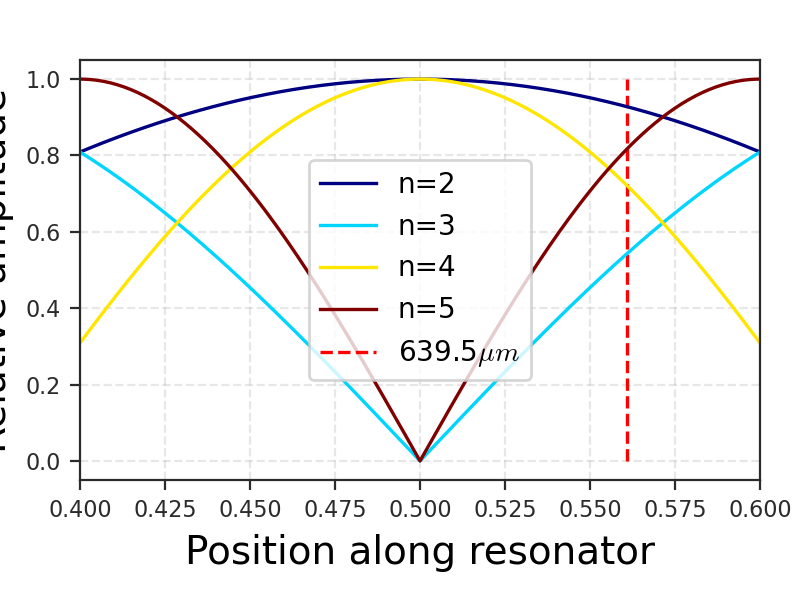

In [84]:
L = 1140
qubit_positions = [1/2 + 69.5/L]
N = [2, 3, 4, 5]


def resonator_voltage_scaling(x: float, mode: int):
    "x is in units between 0 and 1"
    return np.abs(np.cos(mode * np.pi * x))


fig, ax = plt.subplots(1, 1, figsize=(4, 3))
cm = plt.cm.jet(np.linspace(0, 1, len(N)))
x = np.linspace(0, 1, 1001)

# Plot voltage modes
for idx, n in enumerate(N):
    ax.plot(x, resonator_voltage_scaling(x, n),
            color=cm[idx], label=f"n={n}")

# Plot qubit positions
for q in qubit_positions:
    ax.vlines(q, 0, 1, color="red", linestyles='--',
              label=f"{1140*q}$\mu{{m}}$")

ax.set_xlim([0.4, 0.6])
ax.set_xlabel("Position along resonator")
ax.set_ylabel("Relative amplitude")
ax.legend()

#plt.savefig("./data/2020-07_cqps-single/resonator.svg")

## Resonator Fitting

fr = 3.1367491265796184 GHz
Ql = 1129.055709943327
A = 1.9771588878632131
c = 1.0110937206136499
kappa/(2 pi) = 2.7782058041556406 MHz


<IPython.core.display.Javascript object>


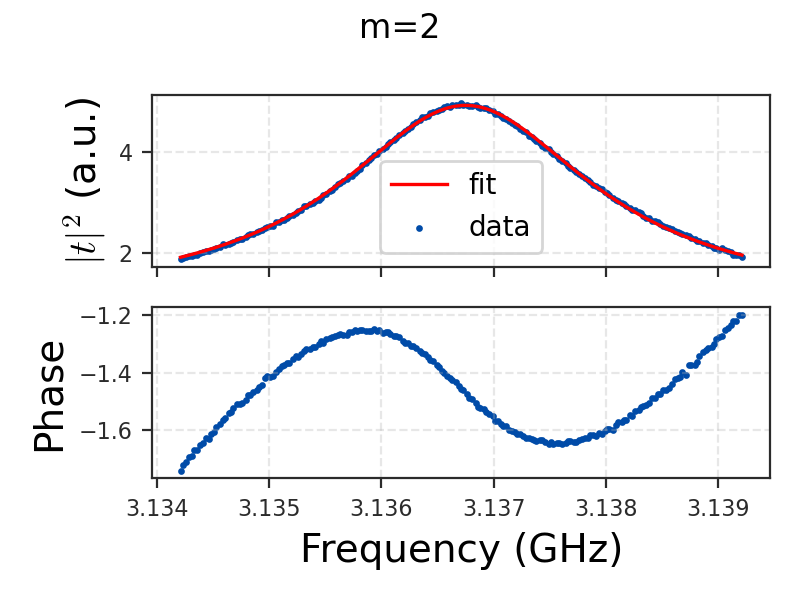

In [80]:
## Fitting resonator modes
## Raw data files: res01, cell Ay

FILENAME="./data/CQPS paper/data for article/TiN95_CQPS_C_July12'20_res_01.xlsx"

## Second resonator mode
# Load data
import pandas as pd
df = pd.read_excel (FILENAME, sheet_name='m2')
m2 = pd.DataFrame(df, columns=['Frequency','r','e'])
freq = df['Frequency']*10**-9 #in GHz
Mag = df['r'] #r
Phase = df['e'] #e

## Lorentzian fit to obtain loaded Quality factor, Q_l

import scipy as sp
from scipy.optimize import curve_fit 

def _S21(f,fr,Ql,A,c):
       return A**2/(1.+4.*Ql**2*((f-fr)/fr)**2)+c
# Initial guess of the parameters (you must find them some way!)
pguess = [3.1368, 1511, 9,1] #fr (GHz), Ql, A, c (Offset) 
# Fit the data, does not work
popt, pcov = curve_fit(_S21, freq, Mag, p0 = pguess, method='lm')
# Results
#print(popt)
print('fr = ' +str(popt[0])+' GHz')
print('Ql = ' +str(popt[1]))
print('A = ' +str(popt[2]))
print('c = ' +str(popt[3]))

kappa = popt[0]*1e9/popt[1]*1e-6 #MHz fn/Q
print('kappa/(2 pi) = ' +str(kappa)+' MHz')


# Plot data
fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(4, 3))
fig.suptitle('m=2')
ax1.scatter(freq, Mag, marker="o", s=2, label='data')
#ax1.plot(freq, myfit(freq, pguess[0], pguess[1], pguess[2], pguess[3]),'g',label='intial guess') #plot initial guess
ax1.plot(freq,_S21(freq, popt[0], popt[1], popt[2], popt[3]),'r',label='fit') #plot fit
ax1.legend()
ax1.legend()
#ax1.set_xlabel("Frequency (GHz)")
ax1.set_ylabel("$|t|^2 $ (a.u.)")
ax2.scatter(freq, Phase, marker="o", s=2)
ax2.set_xlabel("Frequency (GHz)")
ax2.set_ylabel("Phase")
plt.tight_layout()


fr = 5.124449415583922 GHz
Ql = 827.0903213748282
A = 1.970982386480035
c = 1.0838152768335418
kappa/(2 pi) = 6.195755509586695 MHz


<IPython.core.display.Javascript object>


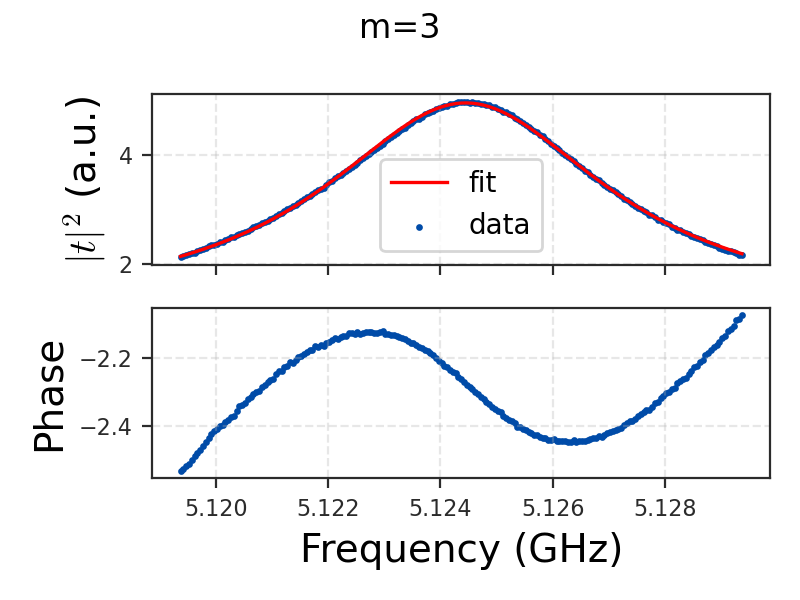

In [81]:
## Fitting resonator modes
## Raw data files: res01

FILENAME="./data/CQPS paper/data for article/TiN95_CQPS_C_July12'20_res_01.xlsx"

## Third resonator mode, m=3
# Load data
import pandas as pd
df = pd.read_excel (FILENAME, sheet_name='m3')
m3 = pd.DataFrame(df, columns=['Frequency','r','e'])
freq = df['Frequency']*10**-9 #in GHz
Mag = df['r'] #r
Phase = df['e'] #e

## Lorentzian fit to obtain loaded Quality factor, Q_l

import scipy as sp
from scipy.optimize import curve_fit 

def _S21(f,fr,Ql,A,c):
       return A**2/(1.+4.*Ql**2*((f-fr)/fr)**2)+c
# Initial guess of the parameters (you must find them some way!)
pguess = [5.124, 1129, 2,0]
# Fit the data, does not work
popt, pcov = curve_fit(_S21, freq, Mag, p0 = pguess, method='lm')
# Results
#print(popt)
print('fr = ' +str(popt[0])+' GHz')
print('Ql = ' +str(popt[1]))
print('A = ' +str(popt[2]))
print('c = ' +str(popt[3]))

kappa = popt[0]*1e9/popt[1]*1e-6 #MHz, kappa/2pi = fn/Q
print('kappa/(2 pi) = ' +str(kappa)+' MHz')

# Plot data
fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(4, 3))
fig.suptitle('m=3')
ax1.scatter(freq, Mag, marker="o", s=2, label='data')
#ax1.plot(freq, _S21(freq, pguess[0], pguess[1], pguess[2], pguess[3]),'g',label='intial guess') #plot initial guess
ax1.plot(freq,_S21(freq, popt[0], popt[1], popt[2], popt[3]),'r',label='fit') #plot fit
ax1.legend()
ax1.legend()
#ax1.set_xlabel("Frequency (GHz)")
ax1.set_ylabel("$|t|^2 $ (a.u.)")
ax2.scatter(freq, Phase, marker="o", s=2)
ax2.set_xlabel("Frequency (GHz)")
ax2.set_ylabel("Phase")
plt.tight_layout()

fr = 6.283513034105836 GHz
Ql = 400.3843641735347
A = 1.8549497707416605
c = -0.4860380814429356
kappa/(2 pi) = 15.693702342937732 MHz


<IPython.core.display.Javascript object>


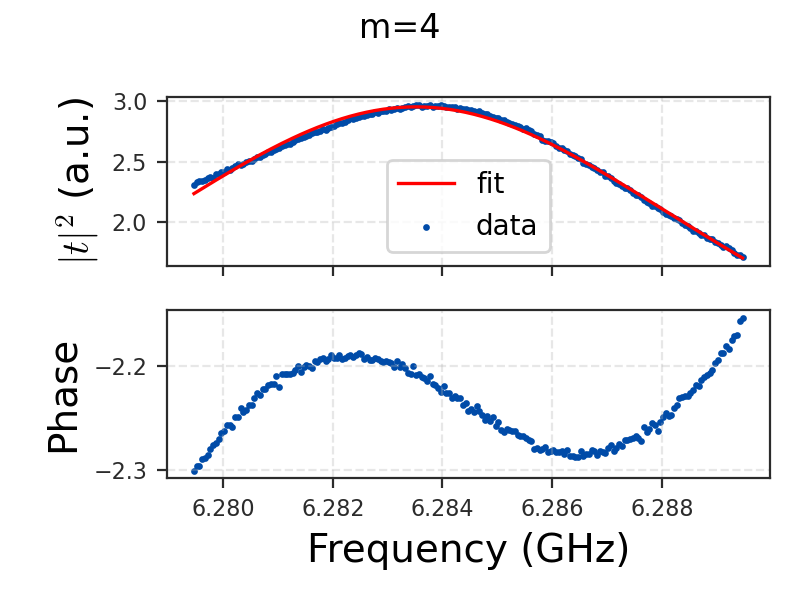

In [82]:
## Fitting resonator modes
## Raw data files: res01

FILENAME="./data/CQPS paper/data for article/TiN95_CQPS_C_July12'20_res_01.xlsx"

## Fourth resonator mode, m=4
# Load data
import pandas as pd
df = pd.read_excel (FILENAME, sheet_name='m4')
m4 = pd.DataFrame(df, columns=['Frequency','r','e'])
freq = df['Frequency']*10**-9 #in GHz
Mag = df['r'] #r
Phase = df['e'] #e

## Lorentzian fit to obtain loaded Quality factor, Q_l

import scipy as sp
from scipy.optimize import curve_fit 

def _S21(f,fr,Ql,A,c):
       return A**2/(1.+4.*Ql**2*((f-fr)/fr)**2)+c
# Initial guess of the parameters (you must find them some way!)
pguess = [6.284, 1129, 2,0]
# Fit the data, does not work
popt, pcov = curve_fit(_S21, freq, Mag, p0 = pguess, method='lm')
# Results
#print(popt)
print('fr = ' +str(popt[0])+' GHz')
print('Ql = ' +str(popt[1]))
print('A = ' +str(popt[2]))
print('c = ' +str(popt[3]))

kappa = popt[0]*1e9/popt[1]*1e-6 #MHz fn/Q
print('kappa/(2 pi) = ' +str(kappa)+' MHz')

# Plot data
fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(4, 3))
fig.suptitle('m=4')
ax1.scatter(freq, Mag, marker="o", s=2, label='data')
#ax1.plot(freq, _S21(freq, pguess[0], pguess[1], pguess[2], pguess[3]),'g',label='intial guess') #plot initial guess
ax1.plot(freq,_S21(freq, popt[0], popt[1], popt[2], popt[3]),'r',label='fit') #plot fit
ax1.legend()
ax1.legend()
#ax1.set_xlabel("Frequency (GHz)")
ax1.set_ylabel("$|t|^2 $ (a.u.)")
ax2.scatter(freq, Phase, marker="o", s=2)
ax2.set_xlabel("Frequency (GHz)")
ax2.set_ylabel("Phase")
plt.tight_layout()

fr = 7.9462332517509955 GHz
Ql = 556.75423911974
A = 1.0034805179010344
c = 0.30176333558158597
kappa/(2 pi) = 14.272425234362725 MHz


<IPython.core.display.Javascript object>


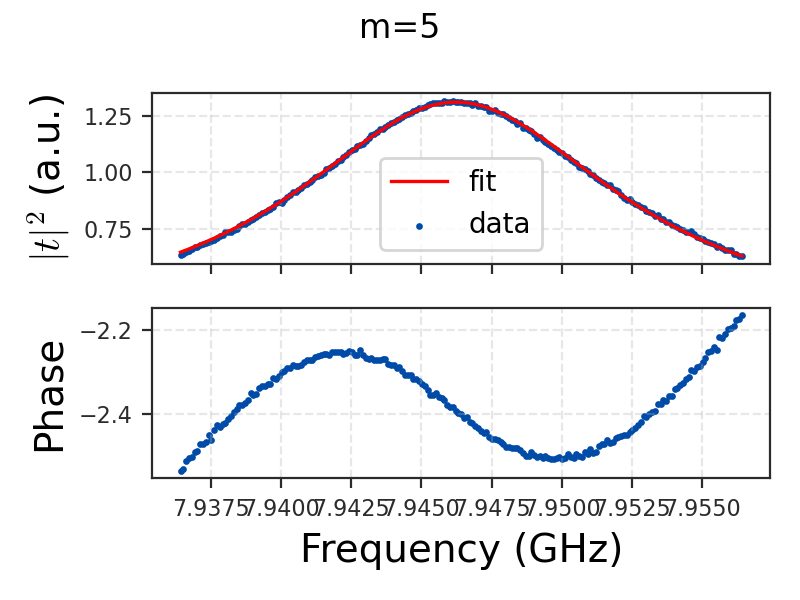

In [83]:
## Fitting resonator modes
## Raw data files: res01

FILENAME="./data/CQPS paper/data for article/TiN95_CQPS_C_July12'20_res_01.xlsx"

## Fifth resonator mode, m=5
# Load data
import pandas as pd
df = pd.read_excel (FILENAME, sheet_name='m5')
m5 = pd.DataFrame(df, columns=['Frequency','r','e'])
freq = df['Frequency']*10**-9 #in GHz
Mag = df['r'] #r
Phase = df['e'] #e

## Lorentzian fit to obtain loaded Quality factor, Q_l

import scipy as sp
from scipy.optimize import curve_fit 

def _S21(f,fr,Ql,A,c):
       return A**2/(1.+4.*Ql**2*((f-fr)/fr)**2)+c
# Initial guess of the parameters (you must find them some way!)
pguess = [7.95, 900, 2,0]
# Fit the data, does not work
popt, pcov = curve_fit(_S21, freq, Mag, p0 = pguess, method='lm')
# Results
#print(popt)
print('fr = ' +str(popt[0])+' GHz')
print('Ql = ' +str(popt[1]))
print('A = ' +str(popt[2]))
print('c = ' +str(popt[3]))

kappa = popt[0]*1e9/popt[1]*1e-6 #MHz fn/Q
print('kappa/(2 pi) = ' +str(kappa)+' MHz')

# Plot data
fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(4, 3))
fig.suptitle('m=5')
ax1.scatter(freq, Mag, marker="o", s=2, label='data')
#ax1.plot(freq, _S21(freq, pguess[0], pguess[1], pguess[2], pguess[3]),'g',label='intial guess') #plot initial guess
ax1.plot(freq,_S21(freq, popt[0], popt[1], popt[2], popt[3]),'r',label='fit') #plot fit
ax1.legend()
ax1.legend()
#ax1.set_xlabel("Frequency (GHz)")
ax1.set_ylabel("$|t|^2 $ (a.u.)")
ax2.scatter(freq, Phase, marker="o", s=2)
ax2.set_xlabel("Frequency (GHz)")
ax2.set_ylabel("Phase")
plt.tight_layout()

fr = 5.120913957738829 GHz
Ql = 640.0454800135293
A = 1.1726744330709975
c = 0.14236244567057912
kappa/(2 pi) = 8.00085949771973 MHz


<IPython.core.display.Javascript object>


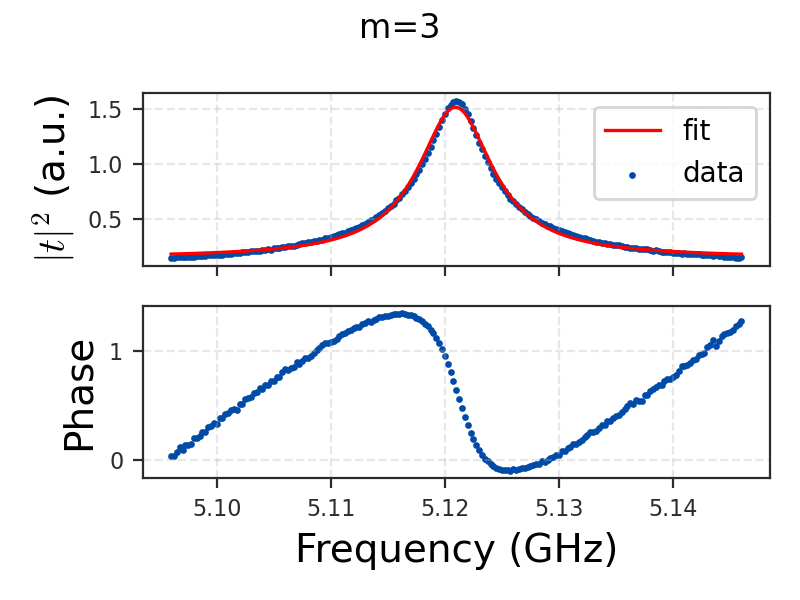

In [86]:
## Fitting resonator modes
## Raw data files: Ay cell, res01

FILENAME="./data/CQPS paper/data for article/TiN95_CQPS_C_July12'20_res_01.xlsx"

## Third resonator mode? but at higher power? Power used was -15dB
# Load data
import pandas as pd
df = pd.read_excel (FILENAME, sheet_name='m6')
m3 = pd.DataFrame(df, columns=['Frequency','r','e'])
freq = df['Frequency']*10**-9 #in GHz
Mag = df['r'] #r
Phase = df['e'] #e

## Lorentzian fit to obtain loaded Quality factor, Q_l

import scipy as sp
from scipy.optimize import curve_fit 

def _S21(f,fr,Ql,A,c):
       return A**2/(1.+4.*Ql**2*((f-fr)/fr)**2)+c
# Initial guess of the parameters (you must find them some way!)
pguess = [5.12444942, 827.09032137,   1.9,   0]
# Fit the data, does not work
popt, pcov = curve_fit(_S21, freq, Mag, p0 = pguess, method='lm')
# Results
#print(popt)
print('fr = ' +str(popt[0])+' GHz')
print('Ql = ' +str(popt[1]))
print('A = ' +str(popt[2]))
print('c = ' +str(popt[3]))

kappa = popt[0]*1e9/popt[1]*1e-6 #MHz fn/Q
print('kappa/(2 pi) = ' +str(kappa)+' MHz')

# Plot data
fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(4, 3))
fig.suptitle('m=3')
ax1.scatter(freq, Mag, marker="o", s=2, label='data')
#ax1.plot(freq, _S21(freq, pguess[0], pguess[1], pguess[2], pguess[3]),'g',label='intial guess') #plot initial guess
ax1.plot(freq,_S21(freq, popt[0], popt[1], popt[2], popt[3]),'r',label='fit') #plot fit
ax1.legend()
ax1.legend()
#ax1.set_xlabel("Frequency (GHz)")
ax1.set_ylabel("$|t|^2 $ (a.u.)")
ax2.scatter(freq, Phase, marker="o", s=2)
ax2.set_xlabel("Frequency (GHz)")
ax2.set_ylabel("Phase")
plt.tight_layout()

# Fitting of qubit spectrum
First we evalaute the transition energies of the cqps system
\begin{equation}
\mathcal{H} = E_L(\hat{n} - f)^2 - \frac{E_s}{2}\bigg[\left|n+1\right\rangle{\left\langle{n}\right|} + \left|n\right\rangle{\left\langle{n+1}\right|}\bigg],
\end{equation}

(It is very similar to the transmon Hamiltonian)
\begin{equation}
    \mathcal{H} = E_C{\left(\hat{N}-N_\text{ext}\right)^2}- \frac{E_J}{2}\bigg(\left|n+1\right\rangle{\left\langle n\right|}+\left|n\right\rangle{\left\langle n+1\right|}\bigg)
\end{equation}
    
I will simply use the transmon Hamiltonian to evaluate energies

<IPython.core.display.Javascript object>


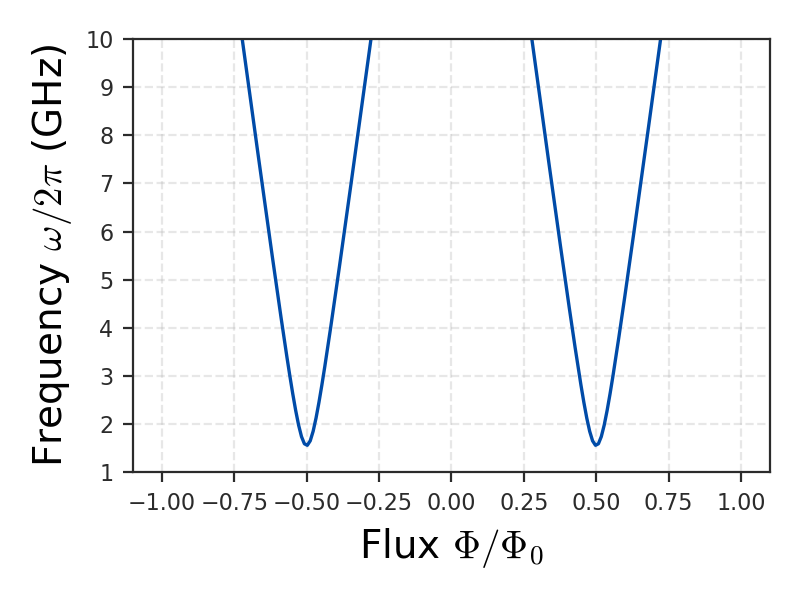

In [87]:
# Here we create the object with which we simulate cqps energies (very simple Hamiltonian). This is reused in all further cells
SIMULATION_PARAMETERS = {
    "number_of_states": 13,
    "number_of_levels_to_simulate": 2
}
QUBIT_PARAMETERS = {
    # We will override them in subsequent evaluations
    "ES": 10,
    "inductive_loop_squares": 30, # 30 140x140nm squares
     **SIMULATION_PARAMETERS
}
cqps_qubit = QuantumBuilder.build_cqps_qubit(
    QUBIT_PARAMETERS, logging_level=logging.ERROR,
)

# Example invocation
FLUX_NUMBER = np.linspace(-1, 1, 200)
EL = 22.2
ES = 1.56
cqps_qubit.cqps_qubit_constant_manager.override_parameters(EL, ES)
simulation = cqps_qubit.run_simulation(
    FLUX_NUMBER, SIMULATION_PARAMETERS["number_of_levels_to_simulate"])
qubit_f01 = simulation["eigvals"][:, 1] - simulation["eigvals"][:, 0]

fig, ax = plt.subplots(1, 1, figsize=(4, 3))
simulation_graph, = ax.plot(FLUX_NUMBER, qubit_f01)

ax.set_xlabel("Flux $\Phi/\Phi_0$")
ax.set_ylabel("Frequency $\omega/2\pi$ (GHz)")
ax.set_ylim([1,10])
plt.tight_layout()

# Next we introduce interaction with the resonator
*Hamitlonian at this stage*

\begin{equation}
 \frac{1}{\hbar}H_{qubit-resonator} = \frac{\omega_{q}}{2}\sigma_z + \omega_r{a^{\dagger}}a + g(a^{\dagger} + a)\sigma_x
\end{equation}

In the truncated matrix form between states $\left|e, N\right\rangle$ and $\left|g, N+1\right\rangle$
\begin{equation}
  \mathcal{H}_{middle} = \begin{pmatrix}
    \frac{\omega_q}{2} + (N)\omega_r & g\sqrt{N+1}\\
    g\sqrt{N+1} & -\frac{\omega_q}{2} + (N+1)\omega_r
  \end{pmatrix}
\end{equation}

We introduce the detuning factor $\delta =\omega_{q} - \omega_{r}$ in order to write out

\begin{equation}
  \mathcal{H}_{middle} = \begin{pmatrix}
    \frac{\delta}{2} + (N+\frac{1}{2})\omega_r & g\sqrt{N+1}\\
    g\sqrt{N+1} & -\frac{\delta}{2} + (N+\frac{1}{2})\omega_r
  \end{pmatrix}
\end{equation}

which reads as
\begin{equation}
  \begin{aligned}
      &= {\hbar\omega_r(N+\frac{1}{2})\mathbb{I} +\frac{ \hbar\delta}{2}\sigma_z} + {\hbar g_0\sqrt{N+1}\sigma_x}\\
      & = {\hbar\omega_r(N+\frac{1}{2})\mathbb{I}} + \frac{1}{2}\sqrt{(\hbar\delta)^2 + 4\hbar^2g_0^2(N+1)} \bigg(\cos(\theta)\sigma_z + \sin(\theta)\sigma_x\bigg)\\
      & = \hbar\omega_r(N+\frac{1}{2})\mathbb{I} + E_{\text{coupled}}(\cos(\theta)\sigma_z + \sin(\theta)\sigma_x)\\
      & \text{where } E_\text{coupled} = \frac{\hbar}{2}\sqrt{\delta^2 + 4g_0^2(N+1)};\qquad \tan(\theta) = \frac{g_0\sqrt{N+1}}{\delta/2}.
  \end{aligned}
\end{equation}

and thus, like in the paper after doing the torating frame

\begin{equation}
\frac{E}{\hbar} = \left( n + \frac{1}{2} \right)\omega_{r} + \frac{\omega_q}{2} \pm \sqrt{\left( \frac{\delta}{2} \right)^2 + g_0^2(N+1)}
\end{equation}

At `N = 0`

\begin{equation}
 \frac{E}{\hbar} = \frac{\omega_{r}}{2} + \frac{\omega_{q}}{2} \pm \sqrt{\left( \frac{\delta}{2} \right)^{2} + g^2}
\end{equation}

**All in units of radians. Therefore any measurement on the VNA is actually $X/2\pi$**

*e.g. we are fitting $g/2\pi$ to the experimental results*

0


<IPython.core.display.Javascript object>


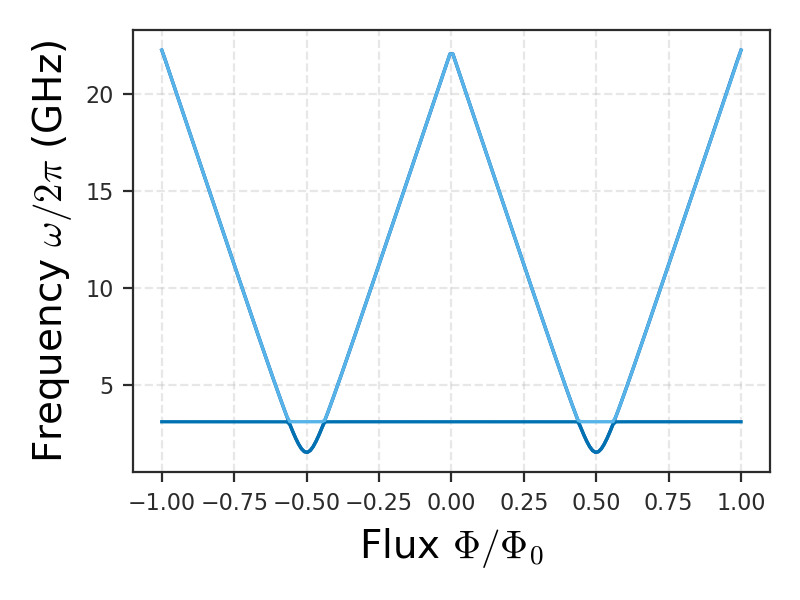

In [88]:
def qubit_resonator_spectrum(qubit_f01: list, resonator_f: float, g: float, N:int=0):
    "See equation (6) above"
    e_high = []
    e_low = []
    print(N)
    for dQubit in qubit_f01:
        a = dQubit / 2
        b = resonator_f * (N + 1/2)
        c = (dQubit - resonator_f) / 2

        factor = np.sqrt(c**2 + g**2*(N+1))
        e_high.append(a+b+factor)
        e_low.append(a+b-factor)
        
    return (e_low, e_high)

# Example invocation
g = 29.9 * (MHz/GHz) # Everything is done in GHz, but MHz is the natural scale
resonator_f = 3.13461
(e_low, e_high) = qubit_resonator_spectrum(qubit_f01, resonator_f, g, N=0)

fig, ax = plt.subplots(1, 1, figsize=(4, 3))
qubit_graph, = ax.plot(FLUX_NUMBER, qubit_f01)
e_low_plot, = ax.plot(FLUX_NUMBER, e_low)
e_high_plot, = ax.plot(FLUX_NUMBER, e_high)

ax.set_xlabel("Flux $\Phi/\Phi_0$")
ax.set_ylabel("Frequency $\omega/2\pi$ (GHz)")
# ax.set_ylim([3.1,3.2])
plt.tight_layout()

# Master equations simulation

We are solving the master equation for the full system

 \begin{equation}
  \begin{aligned}
    \dot{\rho} = -\frac{i}{\hbar}\left[ \mathcal{H}, \rho \right] + \mathcal{L}\left[ \rho \right] & = i\frac{\delta_{q}}{2}\left[ \sigma_z\rho - \rho\sigma_z \right] -i\delta_{r}\left[ {a}^{\dagger}a\rho - \rho{a}^{\dagger}a \right]\\
    & - ig{\left[ a\sigma_+\rho - \rho{a}\sigma_+ + {a}^{\dagger}\sigma_{-}\rho - \rho{a}^{\dagger}\sigma_{-} \right]}\\
    & - i{\frac{\Omega}{2}}\left[ a\rho - \rho{a} + {a}^{\dagger}\rho - \rho{a}^{\dagger} \right]\\
    & + \frac{\kappa}{2}\left[ 2a\rho{a}^{\dagger} - {a}^{\dagger}a\rho - \rho{a}^{\dagger}a \right]\\
    & + \frac{\Gamma_{1}}{2}\left[ 2\sigma_{-}\rho\sigma_{+} - \sigma_+\sigma_{-}\rho - \rho\sigma_+\sigma_{-} \right]\\
    & + \frac{\Gamma_{\phi}}{2}\left[ \sigma_z\rho\sigma_z - \rho \right]
  \end{aligned}
 \end{equation}


## Representation in 2 qubit - 2 resonator basis (N=0, N=1)

We will use the truncated subspace of vectors in the following $\left|e, n\right\rangle, \left|e, n+1\right\rangle, \left|g, n\right\rangle, \left|g, n+1\right\rangle$ with $n=0$

The representation of operator $\hat{A}$ in this subspace will be
\begin{equation}
 \begin{pmatrix}
   \left\langle e, n\right|\hat{A}{\left|e, n\right\rangle} & \left\langle e, n+1\right|\hat{A}{\left|e, n\right\rangle} & \left\langle e, n\right|\hat{A}{\left|g, n\right\rangle} & \left\langle e, n\right|\hat{A}{\left|g, n+1\right\rangle}\\
   \left\langle e, n+1\right|\hat{A}{\left|e, n\right\rangle} & \left\langle e, n+1+1\right|\hat{A}{\left|e, n\right\rangle} & \left\langle e, n+1\right|\hat{A}{\left|g, n\right\rangle} & \left\langle e, n+1\right|\hat{A}{\left|g, n+1\right\rangle}\\
   \left\langle g, n\right|\hat{A}{\left|e, n\right\rangle} & \left\langle g, n+1\right|\hat{A}{\left|e, n\right\rangle} & \left\langle g, n\right|\hat{A}{\left|g, n\right\rangle} & \left\langle g, n\right|\hat{A}{\left|g, n+1\right\rangle}\\
   \left\langle g, n+1\right|\hat{A}{\left|e, n\right\rangle} & \left\langle g, n+1+1\right|\hat{A}{\left|e, n\right\rangle} & \left\langle g, n+1\right|\hat{A}{\left|g, n\right\rangle} & \left\langle g, n+1\right|\hat{A}{\left|g, n+1\right\rangle}\\
 \end{pmatrix}
\end{equation}

In [11]:
NR = 2
OFFSET = 0

qubit_ket = qt.basis(2,0)
resonator_ket = qt.basis(NR, 0)
example_state = qt.tensor(
    [
        qt.ket2dm(qubit_ket), 
        qt.ket2dm(resonator_ket)
    ])
example_state

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

\begin{equation}
  \sigma_z =
  \begin{pmatrix}
    1 & . & . & . \\
    . & 1 & . & . \\
    . & . & -1 & .\\
    . & . & . & -1
  \end{pmatrix}
\end{equation}

In [12]:
op_sigmaz = qt.tensor(
    qt.sigmaz(),
    qt.identity(NR)
)
op_sigmaz

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[ 1.  0.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0. -1.  0.]
 [ 0.  0.  0. -1.]]

\begin{equation}
  a=
  \begin{pmatrix}
    . & \sqrt{n+1} & . & . \\
    . & .& .& .\\
    . & . & . & \sqrt{n+1} \\
    . & . & . & .
  \end{pmatrix}
\end{equation}

In [13]:
op_a = qt.tensor(
    qt.identity(2),
    qt.destroy(NR, offset=OFFSET)
)
op_a

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 0.]]

\begin{equation}
  a^{\dagger}=
  \begin{pmatrix}
    . & . & . & . \\
    \sqrt{n} & .& .& .\\
    . & . & . & . \\
    . & . & \sqrt{n} & .
  \end{pmatrix}
\end{equation}


In [14]:
op_adagger = qt.tensor(
    qt.identity(2),
    qt.create(NR, offset=OFFSET)
)
op_adagger

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 1. 0.]]

\begin{equation}
  \sigma_{-} =
  \begin{pmatrix}
    . & . & . & . \\
    . & . & . & . \\
    1 & . & . & . \\
    . & 1 & . & .
  \end{pmatrix}
\end{equation}

In [15]:
op_sigmaminus = qt.tensor(
    qt.sigmam(),
    qt.identity(NR)
)
op_sigmaminus

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]]

\begin{equation}
  \sigma_{+} =
  \begin{pmatrix}
    . & . & 1 & . \\
    . & . & . & 1 \\
    . & . & . & . \\
    . & . & . & .
  \end{pmatrix}
\end{equation}

In [16]:
op_sigmaplus = qt.tensor(
    qt.sigmap(),
    qt.identity(NR)
)
op_sigmaplus

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

\begin{equation}
  a^{\dagger}a =
  \begin{pmatrix}
    n & . & . & . \\
    . & n+1 & . & . \\
    . & . & n & . \\
    . & . & . & n+1
  \end{pmatrix}
\end{equation}

In [17]:
op_n = qt.tensor(
    qt.identity(2),
    qt.num(NR, offset=OFFSET)
)
op_n

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 1.]]

\begin{equation}
  a\sigma_{+}=
  \begin{pmatrix}
    . & . & . & \sqrt{n+1} \\
    . & . & . & . \\
    . & . & . & . \\
    . & . & . & .
  \end{pmatrix}
\end{equation}


In [18]:
op_a_sigmaplus = qt.tensor(
    qt.sigmap(),
    qt.destroy(NR, offset=OFFSET)
)
op_a_sigmaplus

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[0. 0. 0. 1.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

\begin{equation}
  a^{\dagger}\sigma_-=
  \begin{pmatrix}
    . & . & . & . \\
    . & . & . & . \\
    . & . & . & . \\
    \sqrt{n+1} & . & . & .
  \end{pmatrix}
\end{equation}

In [19]:
op_adagger_sigmaminus = qt.tensor(
    qt.sigmam(),
    qt.create(NR, offset=OFFSET)
)
op_adagger_sigmaminus

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]]

## Analytical solution from mathematica
- Using **very** inefficient methods (manual substitution, since Mathematica chockes when told to solve for the 4x4 equations), we have found an analytical solution in the case of weak drive
- $\Omega << 1$ and therefore $\mathcal{O(\Omega^2)}$  terms were set to 0

- The expectation values:

\begin{equation}
  \begin{aligned}
 \left\langle a \right\rangle & = -i{\frac{\Omega/2}{\frac{g^{2}}{\frac{\Gamma_{1}}{2}+\Gamma_{\phi}+i\delta_q} + \left( \frac{\kappa}{2}+i\delta_r \right)}}\\
    &={\frac{\Omega/2}{\frac{g^{2}}{\delta_{q}-i{\left( \frac{\Gamma_{1}}{2}+\Gamma_{\phi} \right)}} - (\delta_r - i\frac{\kappa}{2})}}\\
  \end{aligned}
\end{equation}
\begin{equation}
  \begin{aligned}
     \left\langle a^\dagger \right\rangle &= i{\frac{\Omega/2}{\frac{g^{2}}{\frac{\Gamma_{1}}{2}+\Gamma_{\phi}-i\delta_q} + \left( \frac{\kappa}{2}-i\delta_r \right)}}\\
     &={\frac{\Omega/2}{\frac{g^{2}}{\delta_{q}+i{\left( \frac{\Gamma_{1}}{2}+\Gamma_{\phi} \right)}} - (\delta_r + i\frac{\kappa}{2})}}\\
  \end{aligned}
\end{equation}

- Solutions give the field in the resonator at the output line  and thus the voltage in the resonator
\begin{equation}
 V_r{\left( \left\langle a \right\rangle + \left\langle a^{\dagger} \right\rangle  \right)}
\end{equation}
This field induces a displacement current across capacitance $C_k$ through which the resonator couples to the output line $V_{resonator}/Z_{gap} = V_{resonator} / \frac{1}{i\omega{C_k}}$ which generates a voltage output line with impedance Z
\begin{equation}
 V_{out}(t) \approx V_r{\left( \left\langle a^{\dagger} \right\rangle + \left\langle a \right\rangle  \right)} \left[ -i\omega{C_{k}} \right]Z
\end{equation}

- Subbing in the values will give
\begin{equation}
\begin{aligned}
V_{out}(t) & = -i\omega{C_{k}}Z V_r \left[\frac{\Omega/2}{g^2/\delta_q' - \delta_r'}+cc\right]\\
& = -i\omega{C_{k}}Z V_r \frac{\Omega}{2}\left[ \frac{1}{g^2/\delta_q' - \delta_r'}+ cc\right]\\
 & = -i\omega{C_{k}}Z V_r \left[\frac{C_{k}V_{in}V_r}{\hbar}\frac{1}{2}\right]\left[ \frac{1}{g^2/\delta_q' - \delta_r'}+ cc\right]\\
 & = -i\omega{C_k^2Z}V_{in} \left[ \frac{1}{\hbar}\frac{1}{2} \right] \frac{\hbar\omega}{C_{r}}\left[ \frac{1}{g^2/\delta_q' - \delta_r'}+ cc\right]\\
 & = -i\frac{1}{2}V_{in}\frac{C_k^2\omega^2Z}{C_{r}}\left[ \frac{1}{g^2/\delta_q' - \delta_r'}+ cc\right]\\
\end{aligned}
\end{equation}

where:
- $\delta_{q}'=\delta_{q} + i\left( \frac{\Gamma_1}{2}+\Gamma_{\phi} \right)$
- $\delta_{r}'=\delta_{r} +i\frac{\kappa}{2}$

Then a simple ratio gives the transmission coefficient:
\begin{equation}
 t = \frac{V_{out}}{V_{in}} = -i\frac{1}{2}\frac{C_k^2\omega^2Z}{C_{r}}\left[ \frac{1}{g^2/\delta_q' - \delta_r'} + cc\right]
\end{equation}

which can be expanded in mathematica (bracket section)
\begin{equation}
\frac{2 g^2 \delta _q-2 \delta _q^2 \delta _r-2 \Gamma ^2 \delta _r}{\left(\Gamma  \kappa '+g^2\right)^2-2 g^2 \delta _q \delta _r+\delta _q^2 \left(\left(\kappa '\right)^2+\delta _r^2\right)+\Gamma ^2 \delta _r^2}
\end{equation}

<ipython-input-20-206b3149fad7>:23: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt(


<IPython.core.display.Javascript object>


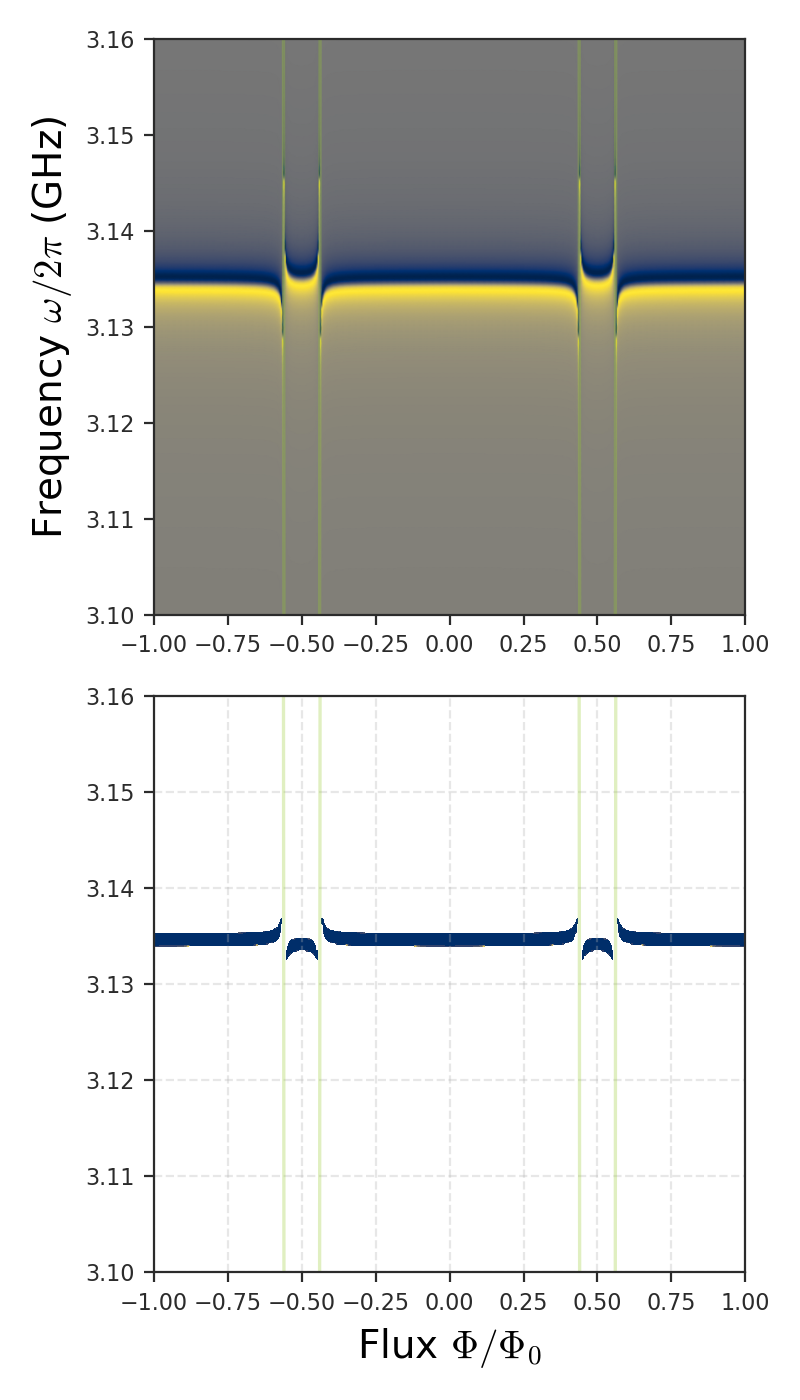

<ipython-input-20-206b3149fad7>:103: UserWarning: The following kwargs were not used by contour: 'sharex'
  ax.contourf(deltaXMesh, deltaYMesh, np.transpose(tGridNoCC), cmap=plt.cm.cividis,sharex=ax_arr[0])


In [20]:
def make_transmission_function_no_cc(Gamma1: float, GammaPhi:float, kappa: float, g: float):
    """
    Function defined within a function, so that it has seeded parameters for constant parameters
    
    See mathematica notebook for how this expansion was found.
    
    Make sure everything is in MHz (or everything is in GHz)
    """
    Gamma = Gamma1/2 + GammaPhi
    kappaPrime = kappa / 2
    twoGSquared = 2*g**2
    twoGammaSquared = 2*Gamma**2
    GammaSquared=Gamma**2
    gSquaredPlusGammaKappaPrimed_allSquared = (g**2 + Gamma*kappaPrime)**2
    kappaPrimeSquared = kappaPrime**2
    
    def transmission(delta_q: float, delta_r: float) -> float:
        delta_qSquared = delta_q**2
        delta_rSquared = delta_r**2
        return (
            1
            / 
            np.sqrt(
                ((g**2 * Gamma)/(GammaSquared+delta_qSquared)+kappaPrime)**2
                -
                ((g**2 * delta_q)/(GammaSquared+delta_qSquared) + delta_r)**2        
            )
        )
    return transmission

def make_transmission_function(Gamma1: float, GammaPhi:float, kappa: float, g: float):
    """
    Function defined within a function, so that it has seeded parameters for constant parameters
    
    See mathematica notebook for how this expansion was found.
    
    Make sure everything is in MHz (or everything is in GHz)
    """
    Gamma = Gamma1/2 + GammaPhi
    kappaPrime = kappa / 2
    twoGSquared = 2*g**2
    twoGammaSquared = 2*Gamma**2
    GammaSquared=Gamma**2
    gSquaredPlusGammaKappaPrimed_allSquared = (g**2 + Gamma*kappaPrime)**2
    kappaPrimeSquared = kappaPrime**2
    
    def transmission(delta_q: float, delta_r: float) -> float:
        delta_qSquared = delta_q**2
        delta_rSquared = delta_r**2
        return (
            (twoGSquared*delta_q - twoGammaSquared*delta_r - 2*delta_qSquared*delta_r)
            / 
            (- twoGSquared*delta_q*delta_r 
             + GammaSquared*delta_rSquared 
             + gSquaredPlusGammaKappaPrimed_allSquared 
             + delta_qSquared*(delta_rSquared + kappaPrimeSquared))
        )
    return transmission

# Example application
Gamma1 = 0.26 # Will be fitted
GammaPhi = 0
kappa = 1.39 # Taken from paper
g = 25
resonator_f = 3.13461
sweep_f = np.linspace(3.1, 3.16, 501)

# Simulate qubit
FLUX_NUMBER = np.linspace(-1, 1, 501)
EL = 22.2
ES = 1.56
cqps_qubit.cqps_qubit_constant_manager.override_parameters(EL, ES)
simulation = cqps_qubit.run_simulation(
    FLUX_NUMBER, SIMULATION_PARAMETERS["number_of_levels_to_simulate"])
qubit_f01 = simulation["eigvals"][:, 1] - simulation["eigvals"][:, 0]

# Construct a matrix of detunings. We step along the magnetic field (changing the freqyency of the qubit) and 
deltaQ = []
deltaR = []
for fq in qubit_f01:
    deltaQ.append(sweep_f - fq)
    deltaR.append(sweep_f - resonator_f)
deltaQ = np.array(deltaQ)*1000 #to convert from GHz to MHz
deltaR = np.array(deltaR)*1000

# Simulate qubit-resonator
tGrid = make_transmission_function(Gamma1, GammaPhi, kappa, g)(deltaQ, deltaR)
tGridNoCC = make_transmission_function_no_cc(Gamma1, GammaPhi, kappa, g)(deltaQ, deltaR)
deltaXMesh, deltaYMesh = np.meshgrid(FLUX_NUMBER, sweep_f)

# Plot
fig, ax_arr = plt.subplots(2, 1, figsize=(4, 7))
ax = ax_arr[0]
ax.pcolormesh(deltaXMesh, deltaYMesh, np.transpose(tGrid), 
              shading='gouraud', 
            cmap=plt.cm.cividis);
ax.plot(FLUX_NUMBER, qubit_f01, color=MY_COLOURS["Green"], alpha=0.3)

ax.set_ylabel("Frequency $\omega/2\pi$ (GHz)")
ax.set_ylim([sweep_f[0], sweep_f[-1]])

ax = ax_arr[1]
ax.contourf(deltaXMesh, deltaYMesh, np.transpose(tGridNoCC), cmap=plt.cm.cividis,sharex=ax_arr[0])
ax.plot(FLUX_NUMBER, qubit_f01, color=MY_COLOURS["Green"], alpha=0.3)
ax.set_ylim([sweep_f[0], sweep_f[-1]])
ax.set_xlabel("Flux $\Phi/\Phi_0$")
plt.tight_layout()

# Multi Photon Process
- Tt cell

In [89]:
PERIOD = (1.084 - 0.485) / 3
#FILENAME="./data/2020-07_cqps-single/multi-photon/TiN95_CQPS_C_July24'20_Tt_two_tone_03_data.txt"
FILENAME="./data/CQPS paper/TiN95_CQPS_C_July24'20_Tt_two_tone_03_data.txt"
OFFSET = 5.423 - 5.5

# Load 3d data
with open(FILENAME) as fin:
    data3d_z = np.transpose(np.loadtxt(FILENAME))
    
    first_line = fin.readline().split()
    data3d_x = np.linspace(float(first_line[1]), float(first_line[2]), data3d_z.shape[1])
    data3d_x = (data3d_x) / PERIOD - OFFSET
    
    second_line = fin.readline().split()
    data3d_y = np.linspace(float(second_line[1]), float(second_line[2]), data3d_z.shape[0])
    
data3d_xmesh, data3d_ymesh = np.meshgrid(data3d_x, data3d_y)
FLUX_NUMBER = np.linspace(data3d_x[0], data3d_x[-1], 200)

FileNotFoundError: [Errno 2] No such file or directory: "./data/CQPS paper/TiN95_CQPS_C_July24'20_Tt_two_tone_03_data.txt"

In [22]:
FLUX_NUMBER = np.linspace(4, 6, 500)
EL = 22.2
ES = 1.26

N_plots = 8
cmap = plt.cm.Reds(np.linspace(0, 1, N_plots))
resonator_f = 3.18

# Simulation
cqps_qubit.cqps_qubit_constant_manager.override_parameters(EL, ES)
simulation = cqps_qubit.run_simulation(
    FLUX_NUMBER, SIMULATION_PARAMETERS["number_of_levels_to_simulate"])
qubit_f01 = simulation["eigvals"][:, 1] - simulation["eigvals"][:, 0]

# We "can" look at the combined qubit-resonator system. But because we are NOT interested in the anticrossing features
# we can forget about the coupling and just write energy as sum of qubit and resonator energies
# (e_low, e_high) = qubit_resonator_spectrum(qubit_f01, resonator_f, g, N=0)

# Plot
fig, ax = plt.subplots(1, 1, figsize=(4, 3))

col_idx = 0
simulation_graph, = ax.plot(FLUX_NUMBER, qubit_f01 - resonator_f, color=cmap[col_idx], linewidth=0.8); col_idx += 1
simulation_graph, = ax.plot(FLUX_NUMBER, qubit_f01, color=cmap[col_idx], linewidth=0.8); col_idx += 1
simulation_graph, = ax.plot(FLUX_NUMBER, qubit_f01 + resonator_f, color=cmap[col_idx], linewidth=0.8); col_idx += 1
simulation_graph, = ax.plot(FLUX_NUMBER, qubit_f01 + resonator_f + resonator_f, color=cmap[col_idx], linewidth=0.8); col_idx += 1
simulation_graph, = ax.plot(FLUX_NUMBER, qubit_f01 + resonator_f *3, color=cmap[col_idx], linewidth=0.8); col_idx += 1
simulation_graph, = ax.plot(FLUX_NUMBER, -qubit_f01 + 3*resonator_f, color=cmap[col_idx], linewidth=0.5); col_idx += 1
simulation_graph, = ax.plot(FLUX_NUMBER, -qubit_f01 + 2*resonator_f, color=cmap[col_idx], linewidth=0.5); col_idx += 1
simulation_graph, = ax.plot(FLUX_NUMBER, -qubit_f01 + 1*resonator_f, color=cmap[col_idx], linewidth=0.5); col_idx += 1

ax.pcolormesh(data3d_xmesh, data3d_ymesh, data3d_z,
              shading='nearest',
              cmap=plt.cm.ocean)

ax.set_xlabel("Flux $\Phi/\Phi_0$")
ax.set_ylabel("Frequency $\omega/2\pi$ (GHz)")
ax.set_ylim([min(data3d_y), max(data3d_y)])
ax.set_xlim([min(data3d_x), max(data3d_x)])
plt.tight_layout()

<IPython.core.display.Javascript object>

NameError: name 'data3d_xmesh' is not defined

In [30]:
plt.savefig(FILENAME.replace(".txt", ".svg"))

FileNotFoundError: [Errno 2] No such file or directory: "./data/2020-07_cqps-single/multi-photon/TiN95_CQPS_C_July24'20_Tt_two_tone_03_data.svg"

# Qubit 12 Analysis
- Ay cell

In [90]:
# Global parameters
PERIOD = 0.1818 # Should not be changed

## Qubit spectrum

In [91]:
#FILENAME="./data/2020-07_cqps-single/two-tone/TiN95_CQPS_C_July12'20_two_tone_44_data.txt"
FILENAME="./data/CQPS paper/TiN95_CQPS_C_July12'20_two_tone_44_data.txt"
OFFSET = 0.1836 - PERIOD/2

# Load 3d data
with open(FILENAME) as fin:
    data3d_z = np.transpose(np.loadtxt(FILENAME))
    
    first_line = fin.readline().split()
    data3d_x = np.linspace(float(first_line[1]), float(first_line[2]), data3d_z.shape[1])
    data3d_x = (data3d_x - OFFSET) / PERIOD
    
    second_line = fin.readline().split()
    data3d_y = np.linspace(float(second_line[1]), float(second_line[2]), data3d_z.shape[0])
    
data3d_xmesh, data3d_ymesh = np.meshgrid(data3d_x, data3d_y)
FLUX_NUMBER = np.linspace(data3d_x[0], data3d_x[-1], 200)

<IPython.core.display.Javascript object>


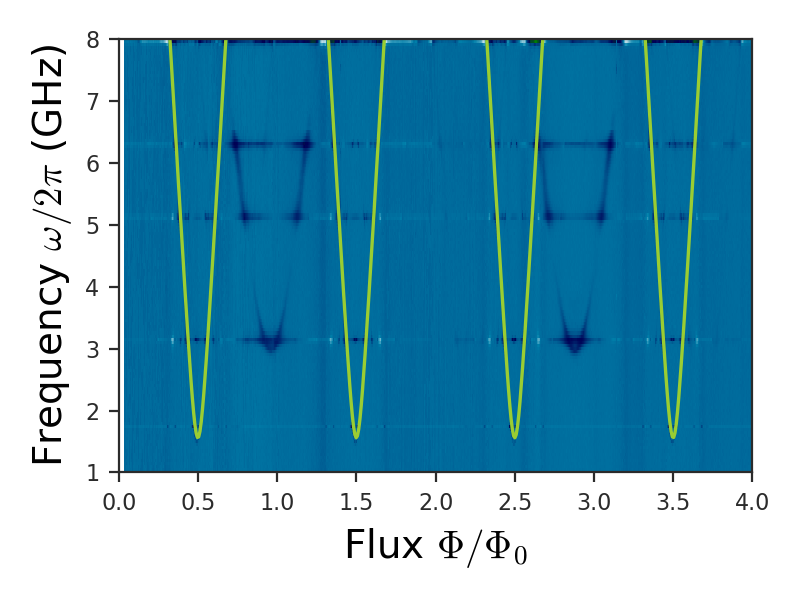

In [92]:
FLUX_NUMBER = np.linspace(0, 4, 500)
EL = 22.2
ES = 1.56

# Simulation
cqps_qubit.cqps_qubit_constant_manager.override_parameters(EL, ES)
simulation = cqps_qubit.run_simulation(
    FLUX_NUMBER, SIMULATION_PARAMETERS["number_of_levels_to_simulate"])
qubit_f01 = simulation["eigvals"][:, 1] - simulation["eigvals"][:, 0]

# Plot
fig, ax = plt.subplots(1, 1, figsize=(4, 3))
simulation_graph, = ax.plot(FLUX_NUMBER, qubit_f01, color=MY_COLOURS["Green"])
# ax.plot(field, response,
#         linestyle="", markersize=3,
#         marker="o", color="orange")
ax.pcolormesh(data3d_xmesh, data3d_ymesh, data3d_z,
              shading='nearest',
              cmap=plt.cm.ocean)

ax.set_xlabel("Flux $\Phi/\Phi_0$")
ax.set_ylabel("Frequency $\omega/2\pi$ (GHz)")
ax.set_ylim([1, 8])
ax.set_xlim([0, 4])
plt.tight_layout()

In [93]:
def update(ES: float, EL: float, toggle: bool):    
    cqps_qubit.cqps_qubit_constant_manager.override_parameters(EL, ES)

    simulation = cqps_qubit.run_simulation(
        FLUX_NUMBER, SIMULATION_PARAMETERS["number_of_levels_to_simulate"])
    qubit_f01 = simulation["eigvals"][:, 1] - simulation["eigvals"][:, 0]

    simulation_graph.set_ydata(qubit_f01)
    simulation_graph.set_visible(toggle)
    ax.relim()
    ax.autoscale_view()
    plt.tight_layout()
    
ES_widget = ipywidgets.FloatSlider(
    min=0, max=10, step=0.1,
    description="$ES (GHZ)$", value=ES,
    layout=ipywidgets.Layout(width='90%'),
    continuous_update=True
)
EL_widget = ipywidgets.FloatSlider(
    min=0, max=30, step=0.1,
    description="$EL (GHz)$", value=EL,
    layout=ipywidgets.Layout(width='90%'),
    continuous_update=True
)
toggle_widget = ipywidgets.Checkbox(
    description='Show/Hide Fit',
    value=True
)

ui = ipywidgets.GridspecLayout(3, 1)
ui[0,0] = ES_widget
ui[1,0] = EL_widget
ui[2,0] = toggle_widget

out = ipywidgets.interactive_output(
    update,
    {
        # Key is the subsituted parameter, Values is the widget to use
        "ES": ES_widget,
        "EL": EL_widget,
        "toggle": toggle_widget
    }
)  

display(ui, out)

GridspecLayout(children=(FloatSlider(value=1.56, description='$ES (GHZ)$', layout=Layout(grid_area='widget001'…

Output()

In [281]:
plt.savefig(FILENAME.replace("txt","png"),dpi=100)

## Anticrossing on m=2
- g = 34MHz
- $\Gamma$ effects the "sharpness" of the up/down cliffs. Very on the eye - we should probably fit it from the qubit linewidth
- Resonator parameters taken from Teresa's fittings

In [97]:
#FILENAME="./data/2020-07_cqps-single/anticrossing/TiN95_CQPS_C_July12'20_mfield-3_13G_18_data.txt"
FILENAME="./data/CQPS paper/TiN95_CQPS_C_July12'20_mfield-3_13G_18_data.txt"
OFFSET = 1.4566 - PERIOD/2

resonator_f = 3.13461 #GHz
kappa = 2.78 #MHz

# These are in MHz
g = 29.9
Gamma1 = 20
GammaPhi = 0

# Load 3d data
with open(FILENAME) as fin:
    data3d_z = np.transpose(np.loadtxt(FILENAME))
    
    first_line = fin.readline().split()
    data3d_x = np.linspace(float(first_line[1]), float(first_line[2]), data3d_z.shape[1])
    data3d_x = (data3d_x - OFFSET) / PERIOD
    
    second_line = fin.readline().split()
    data3d_y = np.linspace(float(second_line[1]), float(second_line[2]), data3d_z.shape[0])

# Build meshes and arrays based of the ranges in the file
data3d_xmesh, data3d_ymesh = np.meshgrid(data3d_x, data3d_y)
FLUX_NUMBER = np.linspace(data3d_x[0], data3d_x[-1], 200)
sweep_f = np.linspace(data3d_y[0], data3d_y[-1], 200)
deltaXMesh, deltaYMesh = np.meshgrid(FLUX_NUMBER, sweep_f)

0


<IPython.core.display.Javascript object>


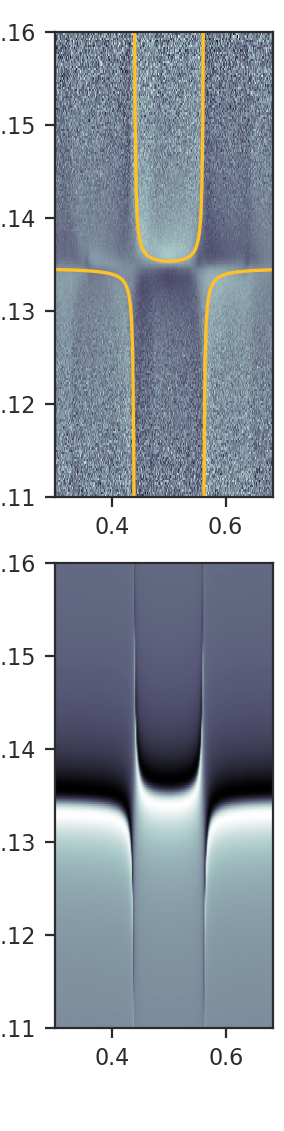

In [98]:
# Qubit
cqps_qubit.cqps_qubit_constant_manager.override_parameters(EL, ES)
simulation = cqps_qubit.run_simulation(
    FLUX_NUMBER, SIMULATION_PARAMETERS["number_of_levels_to_simulate"])
qubit_f01 = simulation["eigvals"][:, 1] - simulation["eigvals"][:, 0]

# Resonator-qubit
(e_low, e_high) = qubit_resonator_spectrum(qubit_f01, resonator_f,
                                           g/1000  # convert to GHz
                                           )

# For master equation simulation
deltaQ = []
deltaR = []
for fq in qubit_f01:
    deltaQ.append(sweep_f - fq)
    deltaR.append(sweep_f - resonator_f)
deltaQ = np.array(deltaQ)*1000  # to convert from GHz to MHz
deltaR = np.array(deltaR)*1000

transmission_function = make_transmission_function(
    Gamma1, GammaPhi, kappa, g)
tMesh = transmission_function(deltaQ, deltaR)

# Plot
fig, ax_arr = plt.subplots(2, 1, figsize=(4, 7))
ax = ax_arr[0]
ax.pcolormesh(data3d_xmesh, data3d_ymesh, data3d_z,
              shading='nearest',
              cmap=plt.cm.bone)
e_low_plot, = ax.plot(FLUX_NUMBER, e_low, color=MY_COLOURS["Orange"])
e_high_plot, = ax.plot(FLUX_NUMBER, e_high, color=MY_COLOURS["Orange"])
ax.set_ylabel("Frequency $\omega/2\pi$ (GHz)")
ax.set_ylim([data3d_y[0], data3d_y[-1]])

ax = ax_arr[1]
ax.pcolormesh(deltaXMesh, deltaYMesh, np.transpose(tMesh), 
              shading='gouraud', 
            cmap=plt.cm.bone)
ax.set_xlabel("Flux $\Phi/\Phi_0$")
ax.set_ylabel("Frequency $\omega/2\pi$ (GHz)")

# ax = ax_arr[2]
# ax.plot(FLUX_NUMBER, qubit_f01, color=MY_COLOURS["Green"],
#         linestyle="-", linewidth=6, alpha=0.5, label="Qubit Spectrum")
# e_low_plot_LARGE, = ax.plot(FLUX_NUMBER, e_low,
#                             color=MY_COLOURS["Orange"])
# e_high_plot_LARGE, = ax.plot(FLUX_NUMBER, e_high,
#                              color=MY_COLOURS["Orange"],
#                              label="Qubit-Resonator"
#                              )
# ax.set_xlabel("Flux $\Phi/\Phi_0$")
# ax.set_ylabel("Frequency $\omega/2\pi$ (GHz)")
# ax.legend()

plt.tight_layout()

In [99]:
def update(g: float, resonator_f: float, Gamma: float, kappa: float, toggle: bool):
    # Pass in g in MHz
    (e_low, e_high) = qubit_resonator_spectrum(qubit_f01, 
                                               resonator_f, 
                                               g/1000)
    e_low_plot.set_ydata(e_low)
    e_high_plot.set_ydata(e_high)
    #e_low_plot_LARGE.set_ydata(e_low)
    #e_high_plot_LARGE.set_ydata(e_high)
    
    e_low_plot.set_visible(toggle)
    e_high_plot.set_visible(toggle)        

    transmission_function = make_transmission_function(Gamma, 0, kappa, g)
    tMesh = transmission_function(deltaQ, deltaR)
    ax_arr[1].clear()
    ax_arr[1].pcolormesh(deltaXMesh, deltaYMesh, np.transpose(tMesh), 
              shading='gouraud', 
            cmap=plt.cm.bone)
CONTINOUS_UPDATE = False    
g_widget = ipywidgets.FloatSlider(
    min=0, max=200, step=0.05,
    description="$g/2\pi (MHz)$", value=g,
    layout=ipywidgets.Layout(width='90%'),
    continuous_update=CONTINOUS_UPDATE
)
resonator_widget = ipywidgets.FloatSlider(
    min=resonator_f*0.9, max=resonator_f*1.1, step=0.005,
    description="$f_r (GHz)$", value=resonator_f,
    layout=ipywidgets.Layout(width='90%'),
    continuous_update=CONTINOUS_UPDATE
)
Gamma_widget = ipywidgets.FloatSlider(
    min=0, max=200, step=0.1,
    description="$\Gamma (MHz)$", value=Gamma1,
    layout=ipywidgets.Layout(width='90%'),
    continuous_update=CONTINOUS_UPDATE
)
kappa_widget = ipywidgets.FloatSlider(
    min=0, max=20, step=0.1,
    description="$\kappa (MHz)$", value=kappa,
    layout=ipywidgets.Layout(width='90%'),
    continuous_update=CONTINOUS_UPDATE
)
toggle_widget = ipywidgets.Checkbox(
    description='Show/Hide Fit',
    value=True
)

ui = ipywidgets.GridspecLayout(4, 2)
ui[0,:] = resonator_widget
ui[1,:] = g_widget
ui[2,0] = Gamma_widget
ui[2,1] = kappa_widget
ui[3,:] = toggle_widget


out = ipywidgets.interactive_output(
    update,
    {
        # Key is the subsituted parameter, Values is the widget to use
        "g": g_widget, "resonator_f": resonator_widget, "toggle": toggle_widget,
        "Gamma": Gamma_widget, "kappa": kappa_widget
    }
)  

display(ui, out)

GridspecLayout(children=(FloatSlider(value=3.13461, continuous_update=False, description='$f_r (GHz)$', layout…

Output()

In [22]:
plt.savefig(FILENAME.replace("txt","pdf"),dpi=100)

## Anticrossing on m=3
- g = 20MHz
- $\Gamma$ effects the "sharpness" of the up/down cliffs. Very on the eye - we should probably fit it from the qubit linewidth

In [104]:
#FILENAME="./data/2020-07_cqps-single/anticrossing/TiN95_CQPS_C_July12'20_mfield-5_12G_16_data.txt"
FILENAME="./data/CQPS paper/TiN95_CQPS_C_July12'20_mfield-5_12G_16_data.txt"
OFFSET = 1.4566 - PERIOD/2

resonator_f = 5.12 #GHz
kappa = 6.2 #MHz

# These are in MHz
g = 20
Gamma1 = 22
GammaPhi = 0

# Load 3d data
with open(FILENAME) as fin:
    data3d_z = np.transpose(np.loadtxt(FILENAME))
    
    first_line = fin.readline().split()
    data3d_x = np.linspace(float(first_line[1]), float(first_line[2]), data3d_z.shape[1])
    data3d_x = (data3d_x - OFFSET) / PERIOD
    
    second_line = fin.readline().split()
    data3d_y = np.linspace(float(second_line[1]), float(second_line[2]), data3d_z.shape[0])

# Build meshes and arrays based of the ranges in the file
data3d_xmesh, data3d_ymesh = np.meshgrid(data3d_x, data3d_y)
FLUX_NUMBER = np.linspace(data3d_x[0], data3d_x[-1], 200)
sweep_f = np.linspace(data3d_y[0], data3d_y[-1], 200)
deltaXMesh, deltaYMesh = np.meshgrid(FLUX_NUMBER, sweep_f)

0


<IPython.core.display.Javascript object>


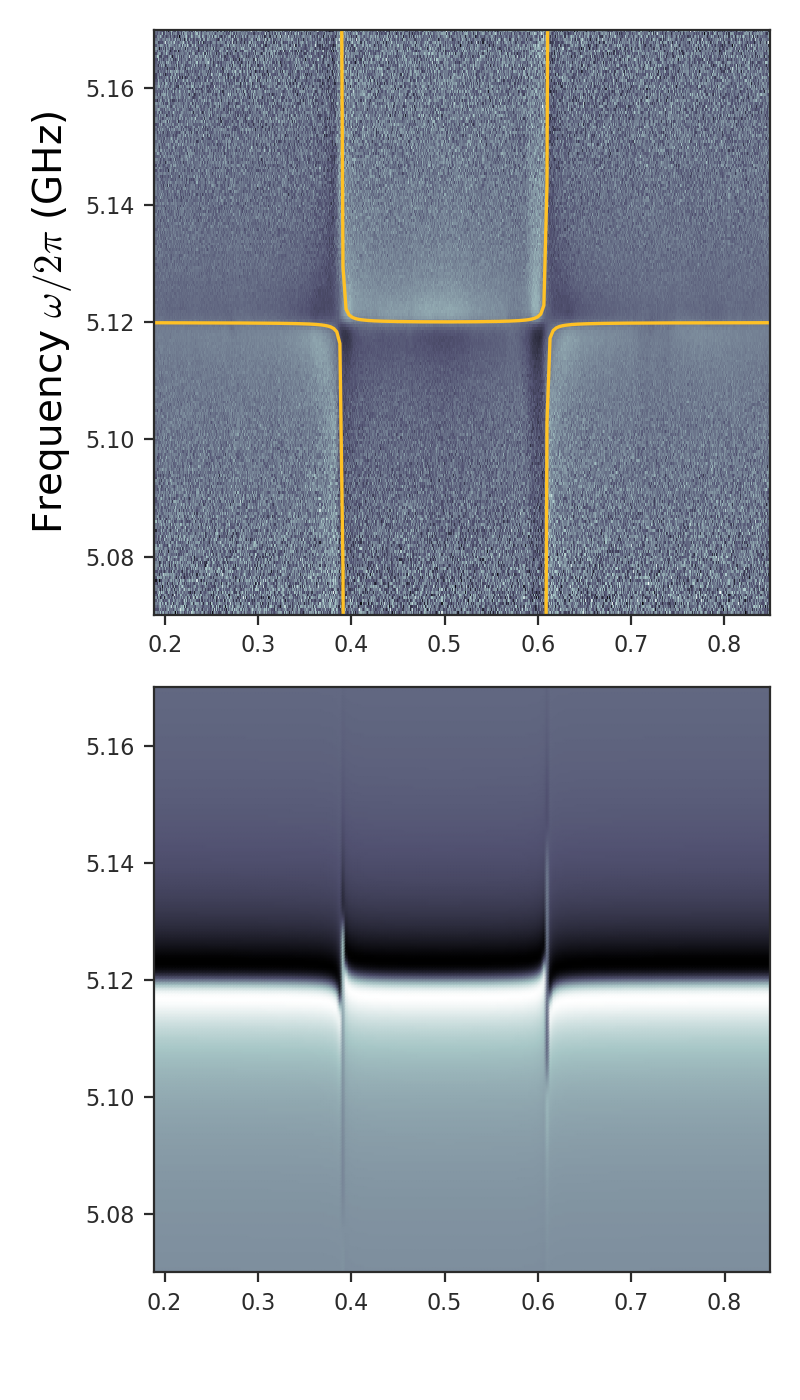

In [105]:
# Qubit
cqps_qubit.cqps_qubit_constant_manager.override_parameters(EL, ES)
simulation = cqps_qubit.run_simulation(
    FLUX_NUMBER, SIMULATION_PARAMETERS["number_of_levels_to_simulate"])
qubit_f01 = simulation["eigvals"][:, 1] - simulation["eigvals"][:, 0]

# Resonator-qubit
(e_low, e_high) = qubit_resonator_spectrum(qubit_f01, resonator_f,
                                           g/1000  # convert to GHz
                                           )

# For master equation simulation
deltaQ = []
deltaR = []
for fq in qubit_f01:
    deltaQ.append(sweep_f - fq)
    deltaR.append(sweep_f - resonator_f)
deltaQ = np.array(deltaQ)*1000  # to convert from GHz to MHz
deltaR = np.array(deltaR)*1000

transmission_function = make_transmission_function(
    Gamma1, GammaPhi, kappa, g)
tMesh = transmission_function(deltaQ, deltaR)

# Plot
fig, ax_arr = plt.subplots(2, 1, figsize=(4, 7))
ax = ax_arr[0]
ax.pcolormesh(data3d_xmesh, data3d_ymesh, data3d_z,
              shading='nearest',
              cmap=plt.cm.bone)
e_low_plot, = ax.plot(FLUX_NUMBER, e_low, color=MY_COLOURS["Orange"])
e_high_plot, = ax.plot(FLUX_NUMBER, e_high, color=MY_COLOURS["Orange"])
ax.set_ylabel("Frequency $\omega/2\pi$ (GHz)")
ax.set_ylim([data3d_y[0], data3d_y[-1]])

ax = ax_arr[1]
ax.pcolormesh(deltaXMesh, deltaYMesh, np.transpose(tMesh), 
              shading='gouraud', 
            cmap=plt.cm.bone)
ax.set_xlabel("Flux $\Phi/\Phi_0$")
ax.set_ylabel("Frequency $\omega/2\pi$ (GHz)")

# ax = ax_arr[2]
# ax.plot(FLUX_NUMBER, qubit_f01, color=MY_COLOURS["Green"],
#         linestyle="-", linewidth=6, alpha=0.5, label="Qubit Spectrum")
# e_low_plot_LARGE, = ax.plot(FLUX_NUMBER, e_low,
#                             color=MY_COLOURS["Orange"])
# e_high_plot_LARGE, = ax.plot(FLUX_NUMBER, e_high,
#                              color=MY_COLOURS["Orange"],
#                              label="Qubit-Resonator"
#                              )
# ax.set_xlabel("Flux $\Phi/\Phi_0$")
# ax.set_ylabel("Frequency $\omega/2\pi$ (GHz)")
# ax.legend()

plt.tight_layout()

In [106]:
def update(g: float, resonator_f: float, Gamma: float, kappa: float, toggle: bool):
    # Pass in g in MHz
    (e_low, e_high) = qubit_resonator_spectrum(qubit_f01, 
                                               resonator_f, 
                                               g/1000)
    e_low_plot.set_ydata(e_low)
    e_high_plot.set_ydata(e_high)    
    #e_low_plot_LARGE.set_ydata(e_low)
    #e_high_plot_LARGE.set_ydata(e_high)
    
    e_low_plot.set_visible(toggle)
    e_high_plot.set_visible(toggle)        

    transmission_function = make_transmission_function(Gamma, 0, kappa, g)
    tMesh = transmission_function(deltaQ, deltaR)
    ax_arr[1].clear()
    ax_arr[1].pcolormesh(deltaXMesh, deltaYMesh, np.transpose(tMesh), 
              shading='gouraud', 
            cmap=plt.cm.bone)
CONTINOUS_UPDATE = False    
g_widget = ipywidgets.FloatSlider(
    min=0, max=200, step=0.05,
    description="$g/2\pi (MHz)$", value=g,
    layout=ipywidgets.Layout(width='90%'),
    continuous_update=CONTINOUS_UPDATE
)
resonator_widget = ipywidgets.FloatSlider(
    min=resonator_f*0.9, max=resonator_f*1.1, step=0.005,
    description="$f_r (GHz)$", value=resonator_f,
    layout=ipywidgets.Layout(width='90%'),
    continuous_update=CONTINOUS_UPDATE
)
Gamma_widget = ipywidgets.FloatSlider(
    min=0, max=200, step=0.1,
    description="$\Gamma (MHz)$", value=Gamma1,
    layout=ipywidgets.Layout(width='90%'),
    continuous_update=CONTINOUS_UPDATE
)
kappa_widget = ipywidgets.FloatSlider(
    min=0, max=20, step=0.1,
    description="$\kappa (MHz)$", value=kappa,
    layout=ipywidgets.Layout(width='90%'),
    continuous_update=CONTINOUS_UPDATE
)
toggle_widget = ipywidgets.Checkbox(
    description='Show/Hide Fit',
    value=True
)

ui = ipywidgets.GridspecLayout(4, 2)
ui[0,:] = resonator_widget
ui[1,:] = g_widget
ui[2,0] = Gamma_widget
ui[2,1] = kappa_widget
ui[3,:] = toggle_widget


out = ipywidgets.interactive_output(
    update,
    {
        # Key is the subsituted parameter, Values is the widget to use
        "g": g_widget, "resonator_f": resonator_widget, "toggle": toggle_widget,
        "Gamma": Gamma_widget, "kappa": kappa_widget
    }
)  

display(ui, out)

GridspecLayout(children=(FloatSlider(value=5.12, continuous_update=False, description='$f_r (GHz)$', layout=La…

Output()

In [27]:
plt.savefig(FILENAME.replace("txt","pdf"),dpi=100)

## Anticrossing on m=4
- $g$ hard to define
- $\Gamma$ effects the "sharpness" of the up/down cliffs. Very on the eye - we should probably fit it from the qubit linewidth

In [109]:
#FILENAME="./data/2020-07_cqps-single/anticrossing/TiN95_CQPS_C_July12'20_mfield-6_3G_m15dBm_43_data.txt"
FILENAME="./data/CQPS paper/TiN95_CQPS_C_July12'20_mfield-6_3G_m15dBm_43_data.txt"
OFFSET = 0.1836 - PERIOD/2

resonator_f = 6.28143 #GHz
kappa = 8.5 #MHz
#kappa = 15.7 #MHz

# These are in MHz
g = 20
Gamma1 = 22
GammaPhi = 0

# Load 3d data
with open(FILENAME) as fin:
    data3d_z = np.transpose(np.loadtxt(FILENAME))
    
    first_line = fin.readline().split()
    data3d_x = np.linspace(float(first_line[1]), float(first_line[2]), data3d_z.shape[1])
    data3d_x = (data3d_x - OFFSET) / PERIOD
    
    second_line = fin.readline().split()
    data3d_y = np.linspace(float(second_line[1]), float(second_line[2]), data3d_z.shape[0])

# Build meshes and arrays based of the ranges in the file
data3d_xmesh, data3d_ymesh = np.meshgrid(data3d_x, data3d_y)
FLUX_NUMBER = np.linspace(data3d_x[0], data3d_x[-1], 200)
sweep_f = np.linspace(data3d_y[0], data3d_y[-1], 200)
deltaXMesh, deltaYMesh = np.meshgrid(FLUX_NUMBER, sweep_f)

0


<IPython.core.display.Javascript object>


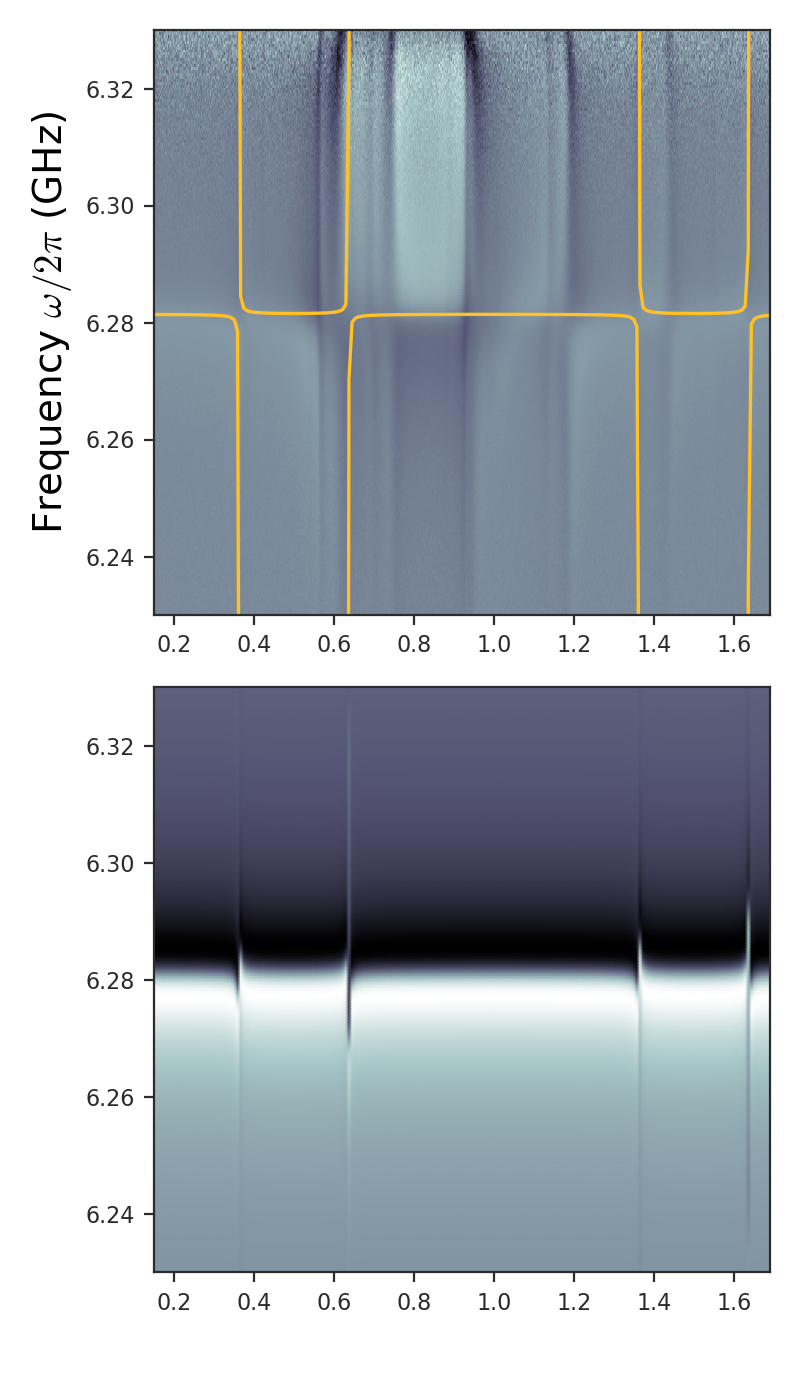

In [110]:
# Qubit
cqps_qubit.cqps_qubit_constant_manager.override_parameters(EL, ES)
simulation = cqps_qubit.run_simulation(
    FLUX_NUMBER, SIMULATION_PARAMETERS["number_of_levels_to_simulate"])
qubit_f01 = simulation["eigvals"][:, 1] - simulation["eigvals"][:, 0]

# Resonator-qubit
(e_low, e_high) = qubit_resonator_spectrum(qubit_f01, resonator_f,
                                           g/1000  # convert to GHz
                                           )

# For master equation simulation
deltaQ = []
deltaR = []
for fq in qubit_f01:
    deltaQ.append(sweep_f - fq)
    deltaR.append(sweep_f - resonator_f)
deltaQ = np.array(deltaQ)*1000  # to convert from GHz to MHz
deltaR = np.array(deltaR)*1000

transmission_function = make_transmission_function(
    Gamma1, GammaPhi, kappa, g)
tMesh = transmission_function(deltaQ, deltaR)

# Plot
fig, ax_arr = plt.subplots(2, 1, figsize=(4, 7))
ax = ax_arr[0]
ax.pcolormesh(data3d_xmesh, data3d_ymesh, data3d_z,
              shading='nearest',
              cmap=plt.cm.bone)
e_low_plot, = ax.plot(FLUX_NUMBER, e_low, color=MY_COLOURS["Orange"])
e_high_plot, = ax.plot(FLUX_NUMBER, e_high, color=MY_COLOURS["Orange"])
ax.set_ylabel("Frequency $\omega/2\pi$ (GHz)")
ax.set_ylim([data3d_y[0], data3d_y[-1]])

ax = ax_arr[1]
ax.pcolormesh(deltaXMesh, deltaYMesh, np.transpose(tMesh), 
              shading='gouraud', 
            cmap=plt.cm.bone)
ax.set_xlabel("Flux $\Phi/\Phi_0$")
ax.set_ylabel("Frequency $\omega/2\pi$ (GHz)")

# ax = ax_arr[2]
# ax.plot(FLUX_NUMBER, qubit_f01, color=MY_COLOURS["Green"],
#         linestyle="-", linewidth=6, alpha=0.5, label="Qubit Spectrum")
# e_low_plot_LARGE, = ax.plot(FLUX_NUMBER, e_low,
#                             color=MY_COLOURS["Orange"])
# e_high_plot_LARGE, = ax.plot(FLUX_NUMBER, e_high,
#                              color=MY_COLOURS["Orange"],
#                              label="Qubit-Resonator"
#                              )
# ax.set_xlabel("Flux $\Phi/\Phi_0$")
# ax.set_ylabel("Frequency $\omega/2\pi$ (GHz)")
# ax.legend()

plt.tight_layout()

In [112]:
def update(g: float, resonator_f: float, Gamma: float, kappa: float, toggle: bool):
    # Pass in g in MHz
    (e_low, e_high) = qubit_resonator_spectrum(qubit_f01, 
                                               resonator_f, 
                                               g/1000)
    e_low_plot.set_ydata(e_low)
    e_high_plot.set_ydata(e_high)    
    #e_low_plot_LARGE.set_ydata(e_low)
    #e_high_plot_LARGE.set_ydata(e_high)
    
    e_low_plot.set_visible(toggle)
    e_high_plot.set_visible(toggle)        

    transmission_function = make_transmission_function(Gamma, 0, kappa, g)
    tMesh = transmission_function(deltaQ, deltaR)
    ax_arr[1].clear()
    ax_arr[1].pcolormesh(deltaXMesh, deltaYMesh, np.transpose(tMesh), 
              shading='gouraud', 
            cmap=plt.cm.bone)
CONTINOUS_UPDATE = False    
g_widget = ipywidgets.FloatSlider(
    min=0, max=200, step=0.05,
    description="$g/2\pi (MHz)$", value=g,
    layout=ipywidgets.Layout(width='90%'),
    continuous_update=CONTINOUS_UPDATE
)
resonator_widget = ipywidgets.FloatSlider(
    min=resonator_f*0.9, max=resonator_f*1.1, step=0.005,
    description="$f_r (GHz)$", value=resonator_f,
    layout=ipywidgets.Layout(width='90%'),
    continuous_update=CONTINOUS_UPDATE
)
Gamma_widget = ipywidgets.FloatSlider(
    min=0, max=200, step=0.1,
    description="$\Gamma (MHz)$", value=Gamma1,
    layout=ipywidgets.Layout(width='90%'),
    continuous_update=CONTINOUS_UPDATE
)
kappa_widget = ipywidgets.FloatSlider(
    min=0, max=20, step=0.1,
    description="$\kappa (MHz)$", value=kappa,
    layout=ipywidgets.Layout(width='90%'),
    continuous_update=CONTINOUS_UPDATE
)
toggle_widget = ipywidgets.Checkbox(
    description='Show/Hide Fit',
    value=True
)

ui = ipywidgets.GridspecLayout(4, 2)
ui[0,:] = resonator_widget
ui[1,:] = g_widget
ui[2,0] = Gamma_widget
ui[2,1] = kappa_widget
ui[3,:] = toggle_widget


out = ipywidgets.interactive_output(
    update,
    {
        # Key is the subsituted parameter, Values is the widget to use
        "g": g_widget, "resonator_f": resonator_widget, "toggle": toggle_widget,
        "Gamma": Gamma_widget, "kappa": kappa_widget
    }
)  

display(ui, out)

GridspecLayout(children=(FloatSlider(value=6.28143, continuous_update=False, description='$f_r (GHz)$', layout…

Output()

## Anticrossing on m=5
- g = 44MHz
- $\Gamma$ effects the "sharpness" of the up/down cliffs. Very on the eye - we should probably fit it from the qubit linewidth

In [113]:
#FILENAME="./data/2020-07_cqps-single/anticrossing/TiN95_CQPS_C_July12'20_mfield-7_9G_m15dBm_38_data.txt"
FILENAME="./data/CQPS paper/TiN95_CQPS_C_July12'20_mfield-7_9G_m15dBm_38_data.txt"

OFFSET = 0.1836 - PERIOD/2

resonator_f = 7.9395 #GHz
#kappa = 11.1 #MHz
kappa = 14.27 #MHz

# These are in MHz
g = 44
Gamma1 = 22
GammaPhi = 0

# Load 3d data
with open(FILENAME) as fin:
    data3d_z = np.transpose(np.loadtxt(FILENAME))
    
    first_line = fin.readline().split()
    data3d_x = np.linspace(float(first_line[1]), float(first_line[2]), data3d_z.shape[1])
    data3d_x = (data3d_x - OFFSET) / PERIOD
    
    second_line = fin.readline().split()
    data3d_y = np.linspace(float(second_line[1]), float(second_line[2]), data3d_z.shape[0])

# Build meshes and arrays based of the ranges in the file
data3d_xmesh, data3d_ymesh = np.meshgrid(data3d_x, data3d_y)
FLUX_NUMBER = np.linspace(data3d_x[0], data3d_x[-1], 200)
sweep_f = np.linspace(data3d_y[0], data3d_y[-1], 200)
deltaXMesh, deltaYMesh = np.meshgrid(FLUX_NUMBER, sweep_f)

0


<IPython.core.display.Javascript object>


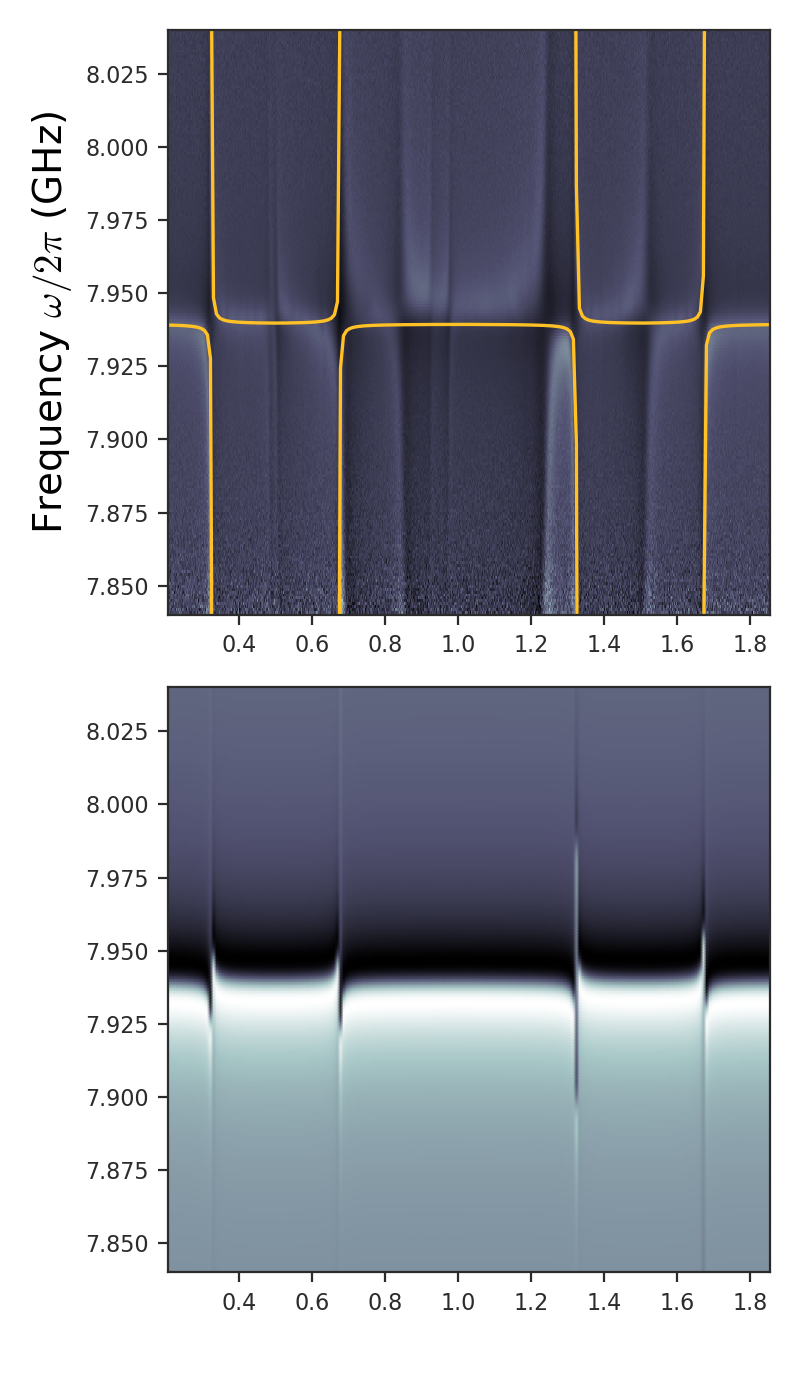

In [114]:
# Qubit
cqps_qubit.cqps_qubit_constant_manager.override_parameters(EL, ES)
simulation = cqps_qubit.run_simulation(
    FLUX_NUMBER, SIMULATION_PARAMETERS["number_of_levels_to_simulate"])
qubit_f01 = simulation["eigvals"][:, 1] - simulation["eigvals"][:, 0]

# Resonator-qubit
(e_low, e_high) = qubit_resonator_spectrum(qubit_f01, resonator_f,
                                           g/1000  # convert to GHz
                                           )

# For master equation simulation
deltaQ = []
deltaR = []
for fq in qubit_f01:
    deltaQ.append(sweep_f - fq)
    deltaR.append(sweep_f - resonator_f)
deltaQ = np.array(deltaQ)*1000  # to convert from GHz to MHz
deltaR = np.array(deltaR)*1000

transmission_function = make_transmission_function(
    Gamma1, GammaPhi, kappa, g)
tMesh = transmission_function(deltaQ, deltaR)

# Plot
fig, ax_arr = plt.subplots(2, 1, figsize=(4, 7))
ax = ax_arr[0]
ax.pcolormesh(data3d_xmesh, data3d_ymesh, data3d_z,
              shading='nearest',
              cmap=plt.cm.bone)
e_low_plot, = ax.plot(FLUX_NUMBER, e_low, color=MY_COLOURS["Orange"])
e_high_plot, = ax.plot(FLUX_NUMBER, e_high, color=MY_COLOURS["Orange"])
ax.set_ylabel("Frequency $\omega/2\pi$ (GHz)")
ax.set_ylim([data3d_y[0], data3d_y[-1]])

ax = ax_arr[1]
ax.pcolormesh(deltaXMesh, deltaYMesh, np.transpose(tMesh), 
              shading='gouraud', 
            cmap=plt.cm.bone)
ax.set_xlabel("Flux $\Phi/\Phi_0$")
ax.set_ylabel("Frequency $\omega/2\pi$ (GHz)")

# ax = ax_arr[2]
# ax.plot(FLUX_NUMBER, qubit_f01, color=MY_COLOURS["Green"],
#         linestyle="-", linewidth=6, alpha=0.5, label="Qubit Spectrum")
# e_low_plot_LARGE, = ax.plot(FLUX_NUMBER, e_low,
#                             color=MY_COLOURS["Orange"])
# e_high_plot_LARGE, = ax.plot(FLUX_NUMBER, e_high,
#                              color=MY_COLOURS["Orange"],
#                              label="Qubit-Resonator"
#                              )
# ax.set_xlabel("Flux $\Phi/\Phi_0$")
# ax.set_ylabel("Frequency $\omega/2\pi$ (GHz)")
# ax.legend()

plt.tight_layout()

In [117]:
def update(g: float, resonator_f: float, Gamma: float, kappa: float, toggle: bool):
    # Pass in g in MHz
    (e_low, e_high) = qubit_resonator_spectrum(qubit_f01, 
                                               resonator_f, 
                                               g/1000)
    e_low_plot.set_ydata(e_low)
    e_high_plot.set_ydata(e_high)    
    #e_low_plot_LARGE.set_ydata(e_low)
    #e_high_plot_LARGE.set_ydata(e_high)
    
    e_low_plot.set_visible(toggle)
    e_high_plot.set_visible(toggle)        

    transmission_function = make_transmission_function(Gamma, 0, kappa, g)
    tMesh = transmission_function(deltaQ, deltaR)
    ax_arr[1].clear()
    ax_arr[1].pcolormesh(deltaXMesh, deltaYMesh, np.transpose(tMesh), 
              shading='gouraud', 
            cmap=plt.cm.bone)
CONTINOUS_UPDATE = False    
g_widget = ipywidgets.FloatSlider(
    min=0, max=200, step=0.05,
    description="$g/2\pi (MHz)$", value=g,
    layout=ipywidgets.Layout(width='90%'),
    continuous_update=CONTINOUS_UPDATE
)
resonator_widget = ipywidgets.FloatSlider(
    min=resonator_f*0.9, max=resonator_f*1.1, step=0.005,
    description="$f_r (GHz)$", value=resonator_f,
    layout=ipywidgets.Layout(width='90%'),
    continuous_update=CONTINOUS_UPDATE
)
Gamma_widget = ipywidgets.FloatSlider(
    min=0, max=200, step=0.1,
    description="$\Gamma (MHz)$", value=Gamma1,
    layout=ipywidgets.Layout(width='90%'),
    continuous_update=CONTINOUS_UPDATE
)
kappa_widget = ipywidgets.FloatSlider(
    min=0, max=20, step=0.1,
    description="$\kappa (MHz)$", value=kappa,
    layout=ipywidgets.Layout(width='90%'),
    continuous_update=CONTINOUS_UPDATE
)
toggle_widget = ipywidgets.Checkbox(
    description='Show/Hide Fit',
    value=True
)

ui = ipywidgets.GridspecLayout(4, 2)
ui[0,:] = resonator_widget
ui[1,:] = g_widget
ui[2,0] = Gamma_widget
ui[2,1] = kappa_widget
ui[3,:] = toggle_widget


out = ipywidgets.interactive_output(
    update,
    {
        # Key is the subsituted parameter, Values is the widget to use
        "g": g_widget, "resonator_f": resonator_widget, "toggle": toggle_widget,
        "Gamma": Gamma_widget, "kappa": kappa_widget
    }
)  

display(ui, out)

GridspecLayout(children=(FloatSlider(value=7.9395, continuous_update=False, description='$f_r (GHz)$', layout=…

Output()

## Anticrossing summary
Since we have
\begin{equation}
 g = \frac{\pi{E_s}C_{q-r}}{2e}\sqrt{\frac{\hbar\omega_r}{C_r}}\cos(n\pi{\frac{x}{L}})
\end{equation}

We should be able to plot g vs $\sqrt{nf_{fundametal}}\cos(n\pi{\frac{x}{L}})$ with
- $L=1140$
- $x = L/2 + 69.5$
- $f_{fundametal}=3.13461\text{GHz}/2$

<IPython.core.display.Javascript object>


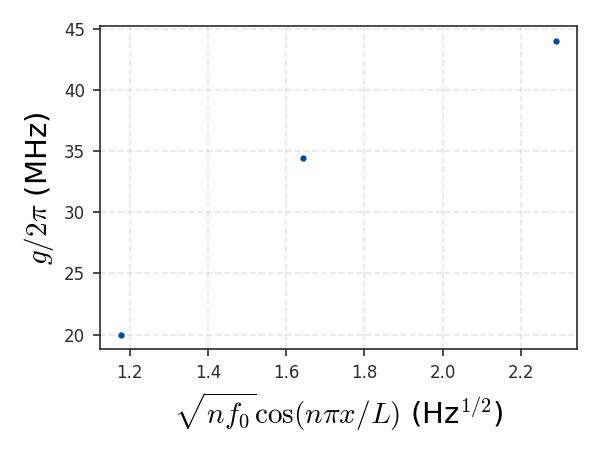

In [36]:
f_fundametal = 3.13461/2 #GHz
L = 1140 #µm
qubit_position = 1/2 + 69.5/L
g_solutions = {
    2: 34.45,
    3: 20,
    5: 44
}

# Generate plot data
x_values = [
    (
        np.sqrt(n*f_fundametal) 
        * np.abs(np.cos(n*np.pi*qubit_position))
    )
    for n in g_solutions.keys()
     ]
y_values = g_solutions.values()

fig, ax = plt.subplots(1, 1, figsize=(4, 3))
ax.plot(x_values, y_values, linestyle="", marker="o")
ax.set_xlabel("$\sqrt{nf_0}\cos(n\pi{x}/L)$ (Hz$^{1/2}$)")
ax.set_ylabel("$g/2\pi$ (MHz)")
plt.tight_layout()

In [ ]:
plt.savefig("data/2020-07_cqps-single/qubit12_g-from-anticrossing.pdf",dpi=100)

# Estimating $E_s$ values
There are a range of different ways to evaluate the $E_c$ value.

In [2]:
# Measured during cooldown TiN95_CQPS_DC_Apr12'19_Tdep_extract.vi on a 80x20µm bar
R_square = 2.04*kOhm / 4
Tc_TiN = 1.7

# Derived
Delta = 1.784*kb*Tc_TiN
L_square = hbar * R_square / np.pi / Delta # Kinetic inductance

# Knowing the frequency of the resonator, we can approximate it's capacitance per square (resonator width is 5µm):
f_resonator = 3.14*GHz / 2 # As this is the second mode
C_square = 1/f_resonator**2/L_square

print(f"""
L_square = {L_square/nH:.2f}nH
C_square (5µm) = {C_square/nF:.2f}nF
""")


L_square = 0.41nH
C_square (5µm) = 0.99nF



## Sebastien de Graff and Sebastien Skatcel
 \begin{equation}
     \begin{aligned}
      E_s & = \Delta \sqrt{\frac{L}{\xi}}\frac{R_{Q}}{R_\xi} \text{exp}\left(-a\frac{R_{Q}}{R_\xi}\right) \\
      a & \approx 0.36 \\
      R_\xi & \text{ normal state resistance of wire segment of length } \xi\\
      R_{Q} & = \frac{h}{4e^{2}} \\
     \end{aligned}
 \end{equation}

In [17]:
# Sebastien paper: 2018_degraf_charge-control-of-blockade-of-cooper-pair-tunnelling-in-highly-disordered-TiN-nanowires-in-an-inductive-environment.pdf
# Also used titanium Nitride
a = 0.36

# All length units in nm
width = 10
L = 50 #nm
coherence_length = 4 #nm from 2018_degraf_charge-control-of-blockade-of-cooper-pair-tunnelling-in-highly-disordered-TiN-nanowires-in-an-inductive-environment.pdf
R_coherence_length = R_square * (coherence_length/width)

Es = Delta * np.sqrt(L/coherence_length) * Rq / R_coherence_length * np.exp(-a * Rq / R_coherence_length)

print(f"Es = {Es/ hbar / GHz:.4f}GHz")

Es = 0.4773GHz


# Comparing extracted $\kappa$ values

Ilya:
- [ ] Capacitance of resonator from fitting EL -> Getting L -> Rearrange resonator equation (repeat for multiple resonator modes) (repeat for different experiments)
- [ ] Capacitance of the coupling resoantor-transmission line by fitting the master equation (fitting amplitude of transmission and extracting $C_k$)

Teresa
- [ ] Sending of EL values for the qubits in paper
- [ ] Try to get $C_{rt}$ and $C_r$ from geometrical simulations

## Evaluating $C_{resonator}$
$f = \frac{v_{ph}}{2L} = \frac{1}{2L\sqrt{cl}} \Rightarrow c=\frac{1}{4L^2 f^2 l}$

where L is the length of resonator, $c, l$ are the capacitances and inductance per unit length respectively.

- Below we take the fits of persistent current in loop $I_p$ and evaluate the inductance in the loop: $L = \frac{\Phi_0}{I_p}$
- Then we normalise by the number of squares forming the loop, to get inductance per square

| Qubit | Ip (nA) | L(nH)     | Loop number of squares | L (nH) per 1.4µm x 1.4µm square |           |
|-------|---------|-----------|------------------------|---------------------------------|-----------|
| 1     | 8.69    | 238.20483 | 35.535714              | 7.5534941                       |           |
| 2     | 7.37    | 280.86839 | 37.214286              | 7.5473271                       |           |
| 3     | 8.07    | 256.50558 | 37.75                  | 6.7948498                       |           |
| 4     | 6.64    | 311.74699 | 39.357143              | 7.9209761                       |           |
| 5     | 7.99    | 259.07384 | 39.821429              | 6.5058901                       |           |
| 6     | 7.9     | 262.02532 | 40.464286              | 6.4754712                       |           |
| 9     | 7.68    | 269.53125 | 43.892857              | 6.1406632                       |           |
| 12    | 7.04    | 294.03409 | 44.857143              | 6.5549001                       | 6.9912388 |
|       |         |           |                        |                                 | average   |

And compare to expected value:
\begin{equation}
  L_{k,\square} = \frac{\hbar{R_\square}}{\pi{\color{red}{\Delta(B)}}}
 \end{equation}

In [275]:
L_expected = hbar * 2.*kOhm/(np.pi*1.738*1.7*kb)
L_expected

1.6500251128555198e-09

In [220]:
# We need to be very careful with the units that we are using
unit_square = 5*um
L_per_unit_square = 7*nH
L_per_unit_length = L_per_unit_square/unit_square

resonator_length = 1150*um
f_resonator = 1.57*GHz
C_per_unit_length = 1/(4 * f_resonator**2 * resonator_length**2 * L_per_unit_length)

C_total = C_per_unit_length * resonator_length
print(f"Resonator capacitance = {C_total/fF:.2f}fF")

Resonator capacitance = 63.00fF


### Incorrect evaluation - I was mixing up units

In [80]:
# From fitting and design geometry (table above)
L_per_unit_square = 7*nH
unit_square = 5*um # this is the width of the resonator
resonator_length = 1150*um

f_resonator = 1.57*GHz

# From resonator equation (resonator made from same material as qubit)
C_per_unit_square = 1/(4 * f_resonator**2 * resonator_length**2 * L_per_unit_square)

L_total = L_per_unit_square * resonator_length / unit_square
C_total = C_per_unit_square * resonator_length / unit_square

print(f"Resonator inductance = {L_total/nH:.2f}nH")
print(f"Resonator capacitance = {C_total/mF:.2f}mF")

Resonator inductance = 1610.00nH
Resonator capacitance = 2.52mF


This seems like a stupendously big capacitance.
- This would imply an impedance of the resonator $Z=\sqrt{\frac{L_\square}{C_\square}}$

In [71]:
Z = np.sqrt(L_per_unit_square/C_per_unit_square)
Z

0.053807511

- Imply a phase velocity $v=1/\sqrt{L_\square C_\square} = c/\sqrt{\epsilon}$

Implying an overwhelming electric permittivity

In [73]:
v_phase = 1/np.sqrt(C_per_unit_square * L_per_unit_square)
electric_permittivity = (3*10**8/v_phase)**2
electric_permittivity

6902.199892156961

### Incorrect previous fitting

In [42]:
# From fitting and design geometry (table above)
L_per_unit_square = 14.901*nH
resonator_width = 5 #µm this will also be the unit length that we use
resonator_length = 1150 #µm
resonator_squares = resonator_length / resonator_width

Z = 50
f_resonator = 1.57*GHz

# From resonator equation (resonator made from same material as qubit)

L = L_per_unit_square * resonator_squares
Cr = 1/(f_resonator**2 * L)

print(f"Resonator inductance = {L/nH:.2f}nH")
print(f"Resonator capacitance = {Cr/fF:.2f}fF")

Resonator inductance = 3427.23nH
Resonator capacitance = 118.37fF


## Evaluating $C_k$
I will be doing this by fitting the amplitude of the anticrossing fits (which we simulate with the master equation)

This is for qubit 12 in cell TY

There doesn't seem to be a consistent value?!?

### m=2

In [205]:
#FILENAME="./data/2020-07_cqps-single/anticrossing/TiN95_CQPS_C_July12'20_mfield-3_13G_18_data.txt"
FILENAME="./data/CQPS paper/TiN95_CQPS_C_July12'20_mfield-3_13G_18_data.txt"
OFFSET = 1.4566 - PERIOD/2

EL = 22.2 #GHz
ES = 1.56 #GHz

resonator_f = 3.13461 #GHz
#kappa = 1.78 #MHz
kappa = 2.78 #MHz

# These are in MHz
#g = 39.9
g = 40
#Gamma1 = 500
Gamma1 = 20
GammaPhi = 0

# Load 3d data
with open(FILENAME) as fin:
    data3d_z = np.transpose(np.loadtxt(FILENAME))
    
    first_line = fin.readline().split()
    data3d_x = np.linspace(float(first_line[1]), float(first_line[2]), data3d_z.shape[1])
    data3d_x = (data3d_x - OFFSET) / PERIOD
    
    second_line = fin.readline().split()
    data3d_y = np.linspace(float(second_line[1]), float(second_line[2]), data3d_z.shape[0])

# Build meshes and arrays based of the ranges in the file
data3d_xmesh, data3d_ymesh = np.meshgrid(data3d_x, data3d_y)
FLUX_NUMBER = np.linspace(data3d_x[0], data3d_x[-1], len(data3d_x))
sweep_f = np.linspace(data3d_y[0], data3d_y[-1], len(data3d_y))
deltaXMesh, deltaYMesh = np.meshgrid(FLUX_NUMBER, sweep_f)

0


<IPython.core.display.Javascript object>


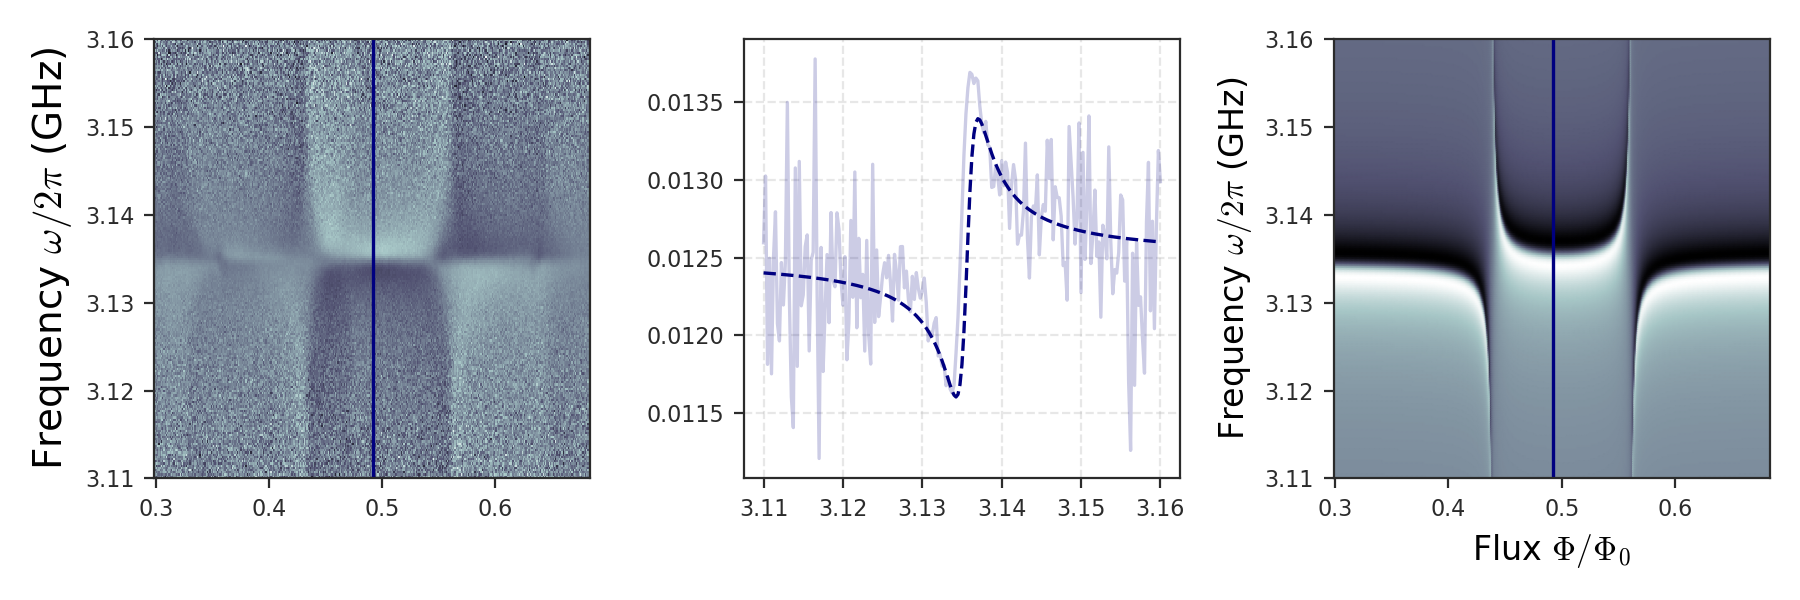

In [206]:
Z = 50
omega_drive = 3.14*GHz * 2*np.pi
#omega_drive = resonator_f*GHz * 2*np.pi
#C_k = 0.00008*fF  # guessed 1fF per 10µm of interface -> 2fF but actually it is much mmuch smaller
C_k = 0.00009*fF
#C_k = 0.00003*fF
#C_k = 0.000018*fF
C_r = 63*fF  # from earlier fits
transmissionScalingPrefactor = - 1/2 * (C_k**2 * omega_drive**2 * Z) / C_r

#Z = 50
#omega_drive = 3.14*GHz * 2*np.pi
#C_k = 6*fF  # guessed 1fF per 10µm of interface -> 2fF
#C_r = 2.52*mF  # from earlier fits
#transmissionScalingPrefactor = - 1/2 * (C_k**2 * omega_drive**2 * Z) / C_r

# Experimental values need to be scaled and offset
TRANSMISSION_OFFSET = 0.00125
TRANSMISSION_MULTIPLIER = 10**((-30 - 60 + 35 + 28 + 28 + 28)/10)

# Experimental values need to be scaled and offset
TRANSMISSION_OFFSET = 0.0125
TRANSMISSION_MULTIPLIER = 10**((-30 -60 + 35 + 28 + 28 + 28 - 10)/10) #The final -10 is to account for random losses

# SLICES = [80, 100, 110, 125, 176, 260]
SLICES = [176]

# Qubit
cqps_qubit.cqps_qubit_constant_manager.override_parameters(EL, ES)
simulation = cqps_qubit.run_simulation(
    FLUX_NUMBER, SIMULATION_PARAMETERS["number_of_levels_to_simulate"])
qubit_f01 = simulation["eigvals"][:, 1] - simulation["eigvals"][:, 0]

# Resonator-qubit
(e_low, e_high) = qubit_resonator_spectrum(qubit_f01, resonator_f,
                                           g/1000  # convert to GHz
                                           )

# For master equation simulation
deltaQ = []
deltaR = []
for fq in qubit_f01:
    deltaQ.append(sweep_f - fq)
    deltaR.append(sweep_f - resonator_f)
deltaQ = np.array(deltaQ)*1000  # to convert from GHz to MHz
deltaR = np.array(deltaR)*1000

transmission_function = make_transmission_function(
    Gamma1, GammaPhi, kappa, g)
tMesh = np.transpose(transmission_function(deltaQ, deltaR))


# Plot
fig, ax_arr = plt.subplots(1, 3, figsize=(9, 3))
ax = ax_arr[0]
ax.pcolormesh(data3d_xmesh, data3d_ymesh, data3d_z,
              shading='nearest',
              cmap=plt.cm.bone)
ax.set_ylabel("Frequency $\omega/2\pi$ (GHz)")
ax.set_ylim([data3d_y[0], data3d_y[-1]])

ax = ax_arr[2]
ax.pcolormesh(deltaXMesh, deltaYMesh, tMesh,
              shading='gouraud',
              cmap=plt.cm.bone)
ax.set_xlabel("Flux $\Phi/\Phi_0$", fontsize=12)
ax.set_ylabel("Frequency $\omega/2\pi$ (GHz)", fontsize=12)

cmap = plt.cm.jet(np.linspace(0, 1, len(SLICES)))
for idx, slice_idx in enumerate(SLICES):
    ax_arr[0].axvline(data3d_x[slice_idx], color=cmap[idx])
    ax_arr[2].axvline(data3d_x[slice_idx], color=cmap[idx])

    SEPARATION = idx * 0.002
    ax_arr[1].plot(data3d_y, SEPARATION + data3d_z[:, slice_idx] /
                   TRANSMISSION_MULTIPLIER, color=cmap[idx], alpha=0.2)
    ax_arr[1].plot(deltaYMesh[:, slice_idx], SEPARATION + TRANSMISSION_OFFSET +
                   transmissionScalingPrefactor * tMesh[:, slice_idx], color=cmap[idx], linestyle="--")

plt.tight_layout()

In [134]:
plt.savefig("./data/quantitative-fit-m2-slice.png")

0


<IPython.core.display.Javascript object>


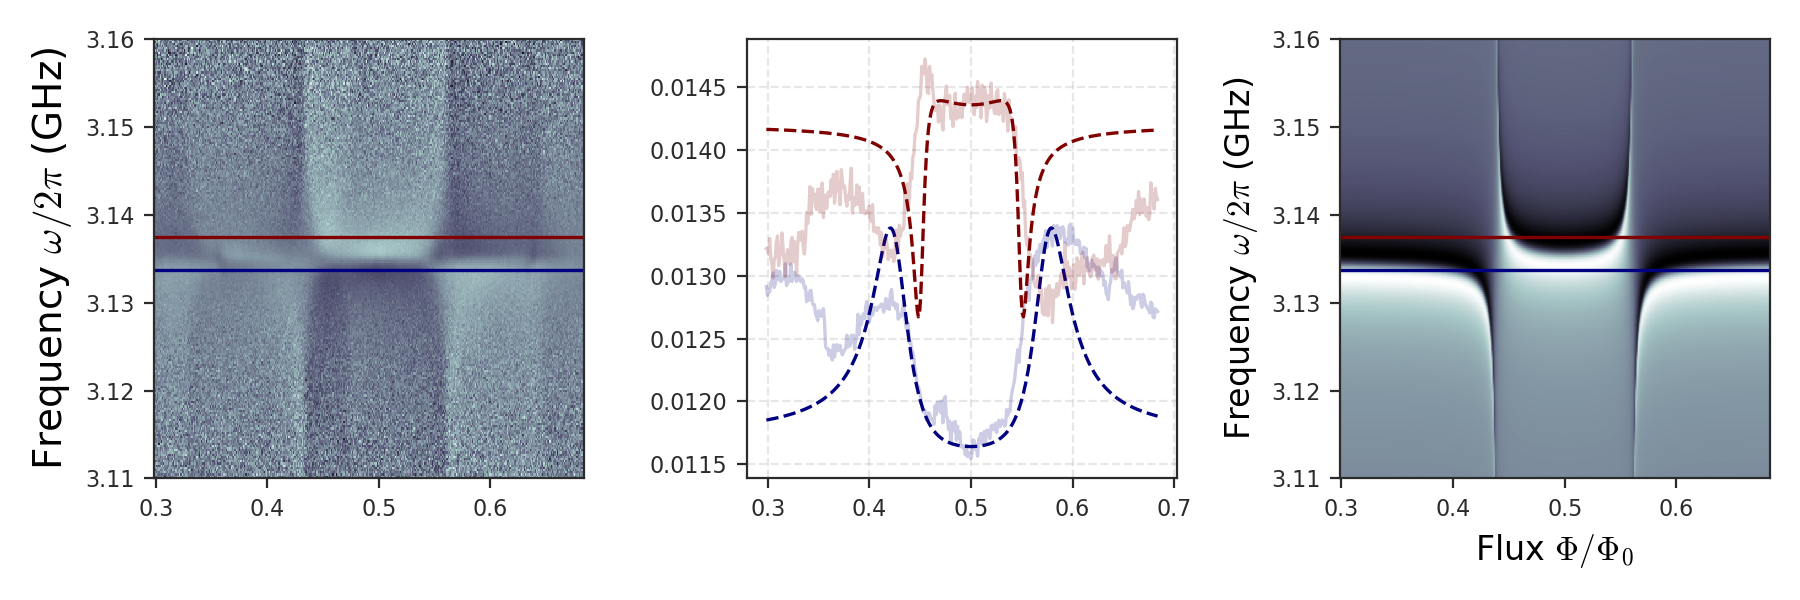

In [207]:
# SLICES = [80, 100, 110, 125, 176, 260]
SLICES = [95,110]

# Qubit
cqps_qubit.cqps_qubit_constant_manager.override_parameters(EL, ES)
simulation = cqps_qubit.run_simulation(
    FLUX_NUMBER, SIMULATION_PARAMETERS["number_of_levels_to_simulate"])
qubit_f01 = simulation["eigvals"][:, 1] - simulation["eigvals"][:, 0]

# Resonator-qubit
(e_low, e_high) = qubit_resonator_spectrum(qubit_f01, resonator_f,
                                           g/1000  # convert to GHz
                                           )

# For master equation simulation
deltaQ = []
deltaR = []
for fq in qubit_f01:
    deltaQ.append(sweep_f - fq)
    deltaR.append(sweep_f - resonator_f)
deltaQ = np.array(deltaQ)*1000  # to convert from GHz to MHz
deltaR = np.array(deltaR)*1000

transmission_function = make_transmission_function(
    Gamma1, GammaPhi, kappa, g)
tMesh = np.transpose(transmission_function(deltaQ, deltaR))


# Plot
fig, ax_arr = plt.subplots(1, 3, figsize=(9, 3))
ax = ax_arr[0]
ax.pcolormesh(data3d_xmesh, data3d_ymesh, data3d_z,
              shading='nearest',
              cmap=plt.cm.bone)
ax.set_ylabel("Frequency $\omega/2\pi$ (GHz)")
ax.set_ylim([data3d_y[0], data3d_y[-1]])

ax = ax_arr[2]
ax.pcolormesh(deltaXMesh, deltaYMesh, tMesh,
              shading='gouraud',
              cmap=plt.cm.bone)
ax.set_xlabel("Flux $\Phi/\Phi_0$", fontsize=12)
ax.set_ylabel("Frequency $\omega/2\pi$ (GHz)", fontsize=12)

cmap = plt.cm.jet(np.linspace(0, 1, len(SLICES)))
for idx, slice_idx in enumerate(SLICES):
    ax_arr[0].axhline(data3d_y[slice_idx], color=cmap[idx])
    ax_arr[2].axhline(data3d_y[slice_idx], color=cmap[idx])

    SEPARATION = idx * 0.001
    ax_arr[1].plot(data3d_x, SEPARATION + data3d_z[slice_idx, :] /
                   TRANSMISSION_MULTIPLIER, color=cmap[idx], alpha=0.2)
    ax_arr[1].plot(deltaXMesh[slice_idx, :], SEPARATION + TRANSMISSION_OFFSET +
                   transmissionScalingPrefactor * tMesh[slice_idx, :], color=cmap[idx], linestyle="--")

plt.tight_layout()

In [294]:
plt.savefig("./data/quantitative-fit-m2-slicey.png")

### m=3

In [213]:
#FILENAME="./data/2020-07_cqps-single/anticrossing/TiN95_CQPS_C_July12'20_mfield-5_12G_16_data.txt"
FILENAME="./data/CQPS paper/TiN95_CQPS_C_July12'20_mfield-5_12G_16_data.txt"
OFFSET = 1.4566 - PERIOD/2

resonator_f = 5.12 #GHz
kappa = 6.19 #MHz

# These are in MHz
g = 20
Gamma1 = 22
GammaPhi = 0

# Load 3d data
with open(FILENAME) as fin:
    data3d_z = np.transpose(np.loadtxt(FILENAME))
    
    first_line = fin.readline().split()
    data3d_x = np.linspace(float(first_line[1]), float(first_line[2]), data3d_z.shape[1])
    data3d_x = (data3d_x - OFFSET) / PERIOD
    
    second_line = fin.readline().split()
    data3d_y = np.linspace(float(second_line[1]), float(second_line[2]), data3d_z.shape[0])

# Build meshes and arrays based of the ranges in the file
data3d_xmesh, data3d_ymesh = np.meshgrid(data3d_x, data3d_y)
FLUX_NUMBER = np.linspace(data3d_x[0], data3d_x[-1], len(data3d_x))
sweep_f = np.linspace(data3d_y[0], data3d_y[-1], len(data3d_y))
deltaXMesh, deltaYMesh = np.meshgrid(FLUX_NUMBER, sweep_f)

0


<IPython.core.display.Javascript object>


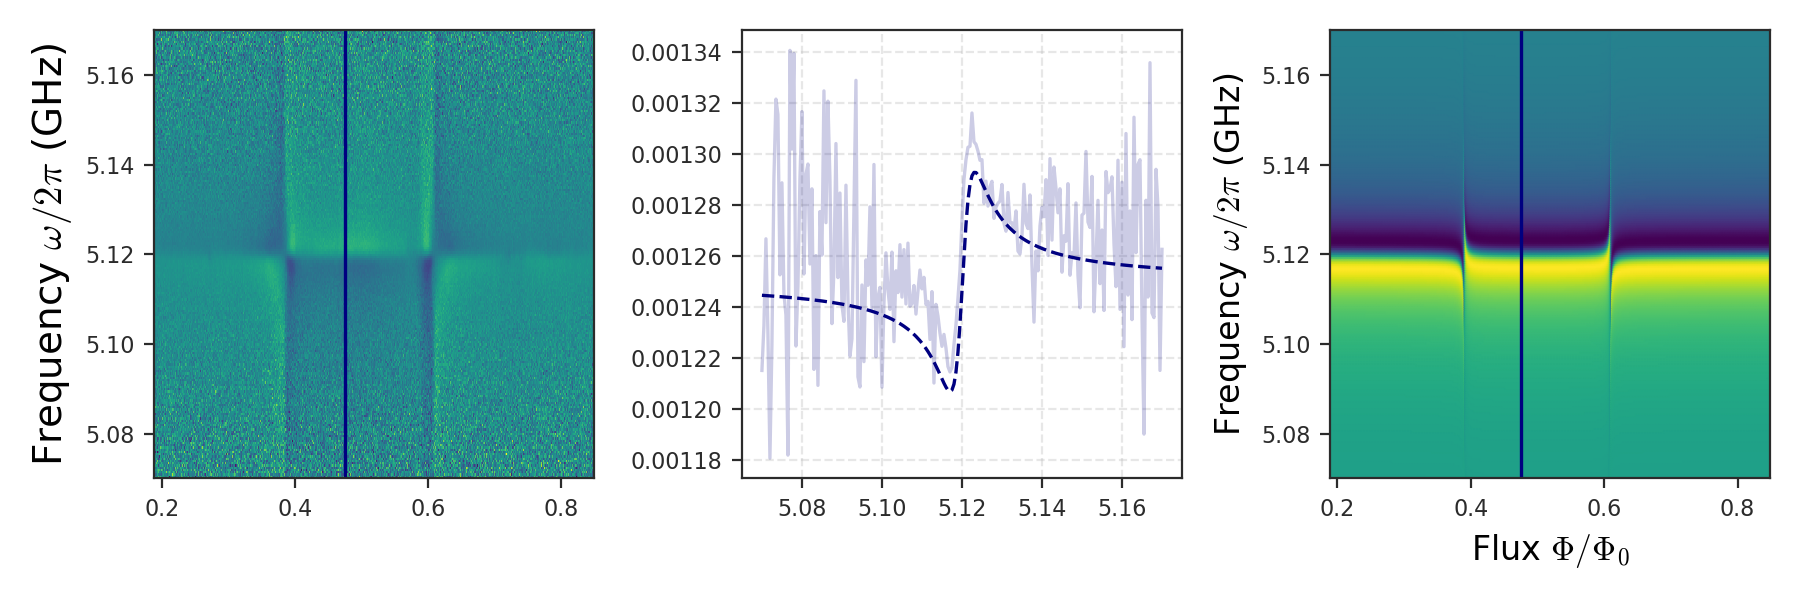

In [215]:
#Z = 50
#omega_drive = 3.14*GHz * 2*np.pi
#C_k = 6*fF  # guessed 1fF per 10µm of interface -> 2fF
#C_r = 2.52*mF  # from earlier fits
#transmissionScalingPrefactor = - 1/2 * (C_k**2 * omega_drive**2 * Z) / C_r

Z = 50
#omega_drive = 3.14*GHz * 2*np.pi
omega_drive = resonator_f*GHz * 2*np.pi
#C_k = 0.00008*fF  # guessed 1fF per 10µm of interface -> 2fF but actually it is much mmuch smaller
C_k = 0.000018*fF
#C_k = 0.00009*fF
C_r = 63*fF  # from earlier fits
transmissionScalingPrefactor = - 1/2 * (C_k**2 * omega_drive**2 * Z) / C_r

# Experimental values need to be scaled and offset
TRANSMISSION_OFFSET = 0.00125
TRANSMISSION_MULTIPLIER = 10**((-30 - 60 + 35 + 28 + 28 + 28)/10)

# SLICES = [80, 100, 110, 125, 176, 260]
SLICES = [260]

# Qubit
cqps_qubit.cqps_qubit_constant_manager.override_parameters(EL, ES)
simulation = cqps_qubit.run_simulation(
    FLUX_NUMBER, SIMULATION_PARAMETERS["number_of_levels_to_simulate"])
qubit_f01 = simulation["eigvals"][:, 1] - simulation["eigvals"][:, 0]

# Resonator-qubit
(e_low, e_high) = qubit_resonator_spectrum(qubit_f01, resonator_f,
                                           g/1000  # convert to GHz
                                           )

# For master equation simulation
deltaQ = []
deltaR = []
for fq in qubit_f01:
    deltaQ.append(sweep_f - fq)
    deltaR.append(sweep_f - resonator_f)
deltaQ = np.array(deltaQ)*1000  # to convert from GHz to MHz
deltaR = np.array(deltaR)*1000

transmission_function = make_transmission_function(
    Gamma1, GammaPhi, kappa, g)
tMesh = np.transpose(transmission_function(deltaQ, deltaR))


# Plot
fig, ax_arr = plt.subplots(1, 3, figsize=(9, 3))
ax = ax_arr[0]
ax.pcolormesh(data3d_xmesh, data3d_ymesh, data3d_z,
              shading='nearest',
              #cmap=cm.bone
             )
ax.set_ylabel("Frequency $\omega/2\pi$ (GHz)")
ax.set_ylim([data3d_y[0], data3d_y[-1]])

ax = ax_arr[2]
ax.pcolormesh(deltaXMesh, deltaYMesh, tMesh,
              shading='gouraud',
              #cmap=cm.bone
             )
ax.set_xlabel("Flux $\Phi/\Phi_0$", fontsize=12)
ax.set_ylabel("Frequency $\omega/2\pi$ (GHz)", fontsize=12)

cmap = plt.cm.jet(np.linspace(0, 1, len(SLICES)))
for idx, slice_idx in enumerate(SLICES):
    ax_arr[0].axvline(data3d_x[slice_idx], color=cmap[idx])
    ax_arr[2].axvline(data3d_x[slice_idx], color=cmap[idx])

    SEPARATION = idx * 0.002
    ax_arr[1].plot(data3d_y, SEPARATION + data3d_z[:, slice_idx] /
                   TRANSMISSION_MULTIPLIER, color=cmap[idx], alpha=0.2)
    ax_arr[1].plot(deltaYMesh[:, slice_idx], SEPARATION + TRANSMISSION_OFFSET +
                   transmissionScalingPrefactor * tMesh[:, slice_idx], color=cmap[idx], linestyle="--")

plt.tight_layout()

## Evaluating $\kappa$
\begin{equation}
\kappa \approx \frac{2ZC_{k}^{2}\omega^{2}}{C_r}
\end{equation}

In [216]:
kappa = 2 * Z * C_k**2 * omega_drive**2 / C_r
kappa

0.0005322358442302291

# Resistance

In [268]:
data[-1,0]

0.291

<IPython.core.display.Javascript object>


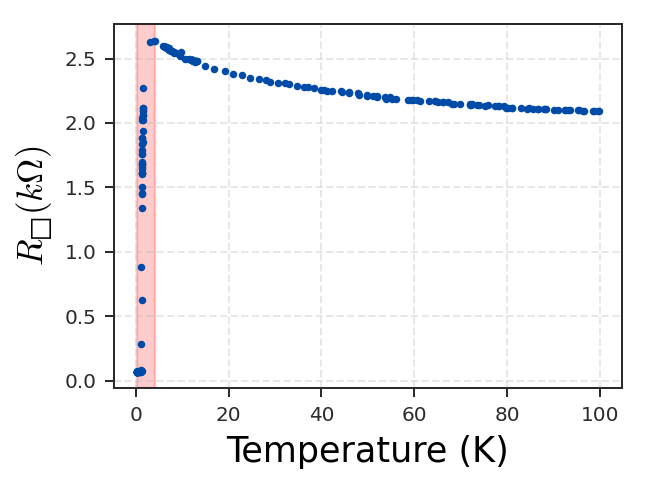

In [270]:
FILENAME = "./data/2020-07_cqps-single/resistance/TiN95_CQPS_DC_Apr12'19_Tdep_extract.txt"
data = np.loadtxt(FILENAME)

fig, ax = plt.subplots(1, 1, figsize=(4, 3))
ax.plot(data[250:, 0], data[250:, 1]/1000, linestyle = "", marker="o")
ax.set_ylabel("$R_{□} (k\Omega)$")
ax.set_xlabel("Temperature (K)")
ax.axvspan(data[388,0], data[-1,0], color='red', alpha=0.2)
plt.tight_layout()

plt.savefig(FILENAME.replace(".txt", ".pdf"))

<IPython.core.display.Javascript object>


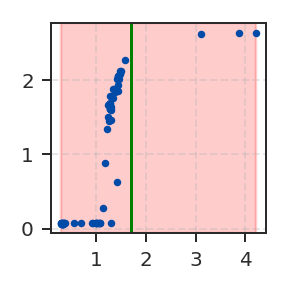

In [273]:
fig, ax = plt.subplots(1, 1, figsize=(1.8, 1.8))
ax.plot(data[388:, 0], data[388:, 1]/1000, linestyle = "", marker="o")
# ax.set_ylabel("$R_{□} (\Omega)$")
# ax.set_xlabel("Temperature (K)")
plt.tight_layout()
plt.xticks(np.arange(0, 5, 1))
ax.axvline(1.7, color = 'green')
ax.axvspan(data[388,0], data[-1,0], color='red', alpha=0.2)

plt.savefig(FILENAME.replace(".txt", "_insert.pdf"))

# Inductive vs Capacitive Coupling 

Galvanical coupling of the qubit's persistent current $I_p$ and the resonator current $I_{res}$ via a shared inductance $L_s$. In the persistent current basis this is represented by

\begin{equation}
\hbar g = L_s I_{res} I_p \sigma_z
\end{equation}

where $g$ is the coupling rate.

Rotating into the qubit basis gives

\begin{equation}
H_{int} = \hbar g = L_s I_{res} I_p \bigg(\frac{E_s}{\hbar \omega_q}\sigma_x+\frac{2 I_p \Phi_0 (f- 1/2)}{\hbar \omega_q}\sigma_z\bigg).
\end{equation}

Under Rotating Wave Approximation (RWA) exact diagonalisation of the Jaynes-Cumming Hamiltonian results in the system ground state $|0,0>$ and dressed excited states

\begin{equation}
|+, n> = \cos \theta_n |1, n-1> + \sin \theta_n |0, n>
\\ |-, n> = \sin \theta_n |1, n-1> - \cos \theta_n |0, n>
\end{equation}

with the mixing angle

\begin{equation}
\theta_n = \frac{1}{2} \arctan \bigg( \frac{2 g \sqrt{n+1}}{\omega_{rq}} \bigg)
\end{equation}

The corresponding eigenergies are

\begin{equation}
E_{1,0} = -\frac{\hbar}{2}\omega_{rq},
\\ E_{\pm,n} = (n+1)\hbar\omega_r \pm \frac{\hbar}{2} \sqrt{4 g^2 (n+1) + \omega^2_{rq}}
\end{equation}

It is obvious that the resonator-qubit detuning $\omega_{rq} = \omega_q -\omega_r$ is a crucial parameter of the system.

Reference: Sebastian Skacels' thesis (page 33)

In the flux eigenbasis, the inductive coupling can be expressed as $g_{\Phi}= \frac{L_s I_r I_p}{h}$. Transforming to the qubit frame, the coupling is given by:

\begin{equation}
\frac{g}{h}=\frac{g_{\Phi}}{h}\frac{E_s}{E_q}
\\ \frac{g}{h}= L_s I_r I_p\frac{E_s}{E_q}
\\ \frac{g}{h}= L_s I_r I_p\frac{E_s}{\sqrt{(2 I_p \delta\Phi)^2+E_s^2}}
\end{equation}

Here, $E_s$ is the tunelling energy and $E_q$ is the flux-dependent qubit energy.

Inserting the resonator current

\begin{equation}
I_r = \sqrt{h f_r/ 2 L_r} \sin(kx)
\end{equation}

gives

\begin{equation}
 \frac{g}{h}= L_s I_p \sqrt{\frac{h f_r/ 2 L_r}{(2 I_p \delta\Phi / E_s)^2+1}}\sin(kx)
\end{equation}

More references:
- O. V. Astafiev, L. B. Ioffe, S. Kafanov, Y. A. Pashkin, K. Y. Arutyunov, D. Shahar, O. Cohen, and J. S. Tsai. “Coherent quantum phase slip”. In: Nature 484.7394 (2012), pp. 355–358. DOI: 10.1038/nature10930 (cit. on pp. 3, 36, 40, 91, 99, 101, 113, 130)

- G. Oelsner, S. H. W. van der Ploeg, P. Macha, U. Hübner, D. Born, S. An- ders, E. Il’ichev, H.-G. Meyer, M. Grajcar, S. Wünsch, M. Siegel, A. N. Omelyanchouk, and O. Astafiev. “Weak continuous monitoring of a flux qubit using coplanar waveguide resonator”. In: Phys. Rev. B 81 (17 2010), p. 172505. DOI: 10.1103/PhysRevB.81.172505 (cit. on pp. 101, 103).

- J. T. Peltonen, O. V. Astafiev, Y. P. Korneeva, B. M. Voronov, A. A. Ko- rneev, I. M. Charaev, A. V. Semenov, G. N. Golt’sman, L. B. Ioffe, T. M. Klapwijk, and J. S. Tsai. “Coherent flux tunneling through NbN nanowires”. In: Phys. Rev. B 88 (22 2013), p. 220506. DOI: 10.1103/PhysRevB. 88.220506 (cit. on pp. 3, 36, 43, 91, 93, 99, 101, 113).

\begin{equation}
I_r = \sqrt{h f_r/ 2 L_r}
\end{equation}

- T. Lindstrom, C. H. Webster, J. E. Healey, M. S. Colclough, C. M. Muir- head, and A. Ya. “Circuit QED with a flux qubit strongly coupled to a copla- nar transmission line resonator”. In: Superconductor Science and Technol- ogy 20.8 (2007), p. 814. DOI: 10.1088/0953-2048/20/8/016 (cit. on pp. 101, 103).(-> for $I_r$)


In comparison to capacitive coupling

\begin{equation}
   g = \frac{\pi E_S }{2 e}C_{q-r}\sqrt{\frac{\hbar \omega_p}{C_r}}\cos{(k x)} 
\end{equation}

<IPython.core.display.Javascript object>


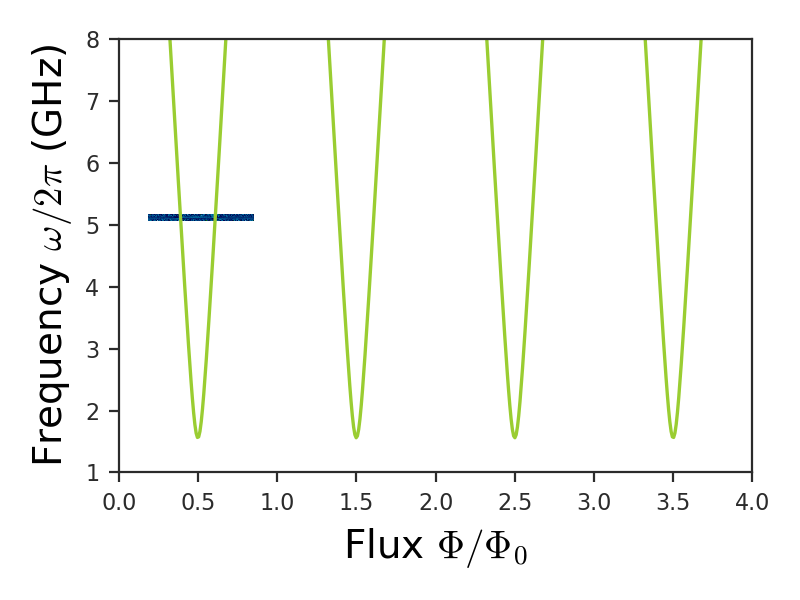

In [217]:
#Qubit Simulation
FLUX_NUMBER = np.linspace(0, 4, 500)
EL = 22.2 #GHz
ES = 1.56 #GHz

# Simulation
cqps_qubit.cqps_qubit_constant_manager.override_parameters(EL, ES)
simulation = cqps_qubit.run_simulation(
    FLUX_NUMBER, SIMULATION_PARAMETERS["number_of_levels_to_simulate"])
qubit_f01 = simulation["eigvals"][:, 1] - simulation["eigvals"][:, 0]

# Plot
fig, ax = plt.subplots(1, 1, figsize=(4, 3))
simulation_graph, = ax.plot(FLUX_NUMBER, qubit_f01, color=MY_COLOURS["Green"])
# ax.plot(field, response,
#         linestyle="", markersize=3,
#         marker="o", color="orange")
ax.pcolormesh(data3d_xmesh, data3d_ymesh, data3d_z,
              shading='nearest',
              cmap=plt.cm.ocean)

ax.set_xlabel("Flux $\Phi/\Phi_0$")
ax.set_ylabel("Frequency $\omega/2\pi$ (GHz)")
ax.set_ylim([1, 8])
ax.set_xlim([0, 4])
plt.tight_layout()

Lr = 1609.9046485674746 nH
Cr = 63.0 fF
Ir = 0.8038550856796562 nA
C_q-r = 1e-15 F
6.374590302585711e-09
g_c/(2 pi) = 13.988681346183592 MHz


<IPython.core.display.Javascript object>


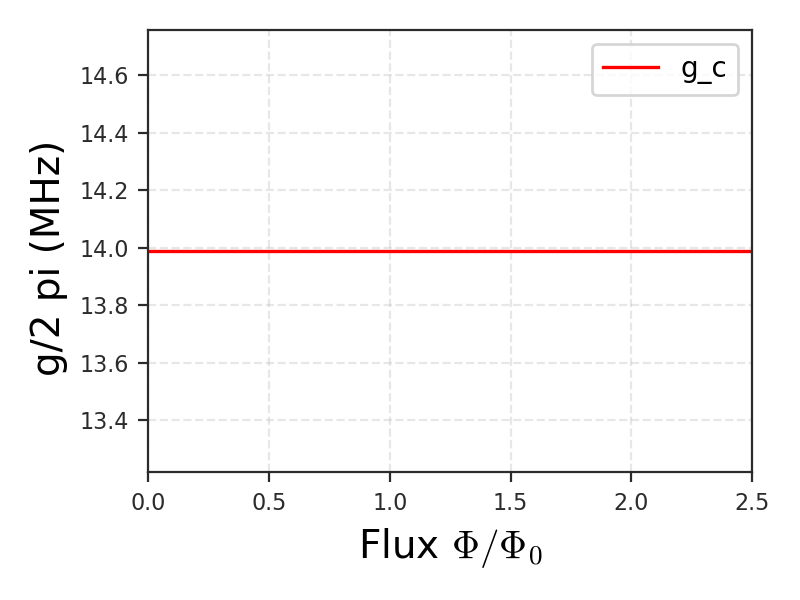

In [222]:
#Need to have run qubit simulation prior to this
import scipy.constants as c 

#Choose parameters
Es = ES*GHz #Hz
# Ip = np.sqrt(abs((c.h*qubit_f01*1e9)**2-Es**2))/(2*FLUX_NUMBER/Phi0) #A #not sure about this
# fig, ax = plt.subplots(1, 1, figsize=(4, 3))
# ax.plot(FLUX_NUMBER, Ip)
# ax.set_xlabel("Flux $\Phi/\Phi_0$")
# ax.set_ylabel("Ip (A) ")
# ax.set_xlim([0.5,10])

Ip = 7e-9 #A, persistent current (qubit 12)
#Ip = 10e-9 #A, persistent current
#Lr = 234e-9 #H, resonator inductance
fr = 3.14e9 #Hz, resonator frequency
#Cr = 1/fr**2/Lr #F, resonator capacitance
Cr = 63e-15 #F, resonator capacitance
Lr = 1/fr**2/Cr #H, calculating resonator inductance
#fr_check = np.sqrt(1/(Lr*Cr))
#print('fr_check = ' + str(fr_check*1e-9) + ' GHz')
print('Lr = ' + str(Lr*1e9) + ' nH')
print('Cr = ' + str(Cr*1e15) + ' fF')
Ir = np.sqrt((c.h*fr)/(2*Lr)) #A, resonator current (typical value 2.47e-9)
print('Ir = ' + str(Ir*1e9) +' nA')

M = 100e9 #H, mutual/shared inductance
Cqr = 1*fF #F, qubit-resonator coupling capacitance
print('C_q-r = '+str(Cqr) +' F')

#inductive coupling
g_l=(M*Ir*Ip*ES)/(qubit_f01) #Hz
print(g_l[1]/(2*c.pi))
#capacitive coupling
g_c = ((c.pi*Es)/(2*c.e))*Cqr*np.sqrt(c.h*fr/Cr) #Hz
print('g_c/(2 pi) = '+str(g_c/(2*c.pi)*1e-6) + ' MHz')
#print('g_c = '+str(g_c*1e-6) + ' MHz')
g_c_array = g_c/(2*c.pi)*np.ones(500)


#Plot g vs detuning
fig, ax = plt.subplots(1, 1, figsize=(4, 3))
#ax.plot(FLUX_NUMBER, g_l*1e-6,label='g_l', color ='b')
ax.plot(FLUX_NUMBER, g_c_array*1e-6,label='g_c', color ='r')
ax.set_xlabel("Flux $\Phi/\Phi_0$")
ax.set_ylabel("g/2 pi (MHz) ")
ax.set_xlim([0,2.5])
plt.legend()
plt.tight_layout()

In [137]:
print(Cr*1e+15)

1733.7434676880496


# Figure 2

In [226]:
# Global parameters
# Should not be changed

#Qubit periods
PERIOD1 = 0.4275 #mA
PERIOD2 = 0.3487 #mA
PERIOD3 = 0.33 #mA, ?
PERIOD4 = 0.2817 #mA
PERIOD5 = 0.2685 #mA
PERIOD9 = 0.20694 #mA
PERIOD12 = 0.1818 #mA

#Magnetic field constant
mf_c = 1.52 #G/mA, cell Tt or Ay?


## Qubit Spectrum

<IPython.core.display.Javascript object>


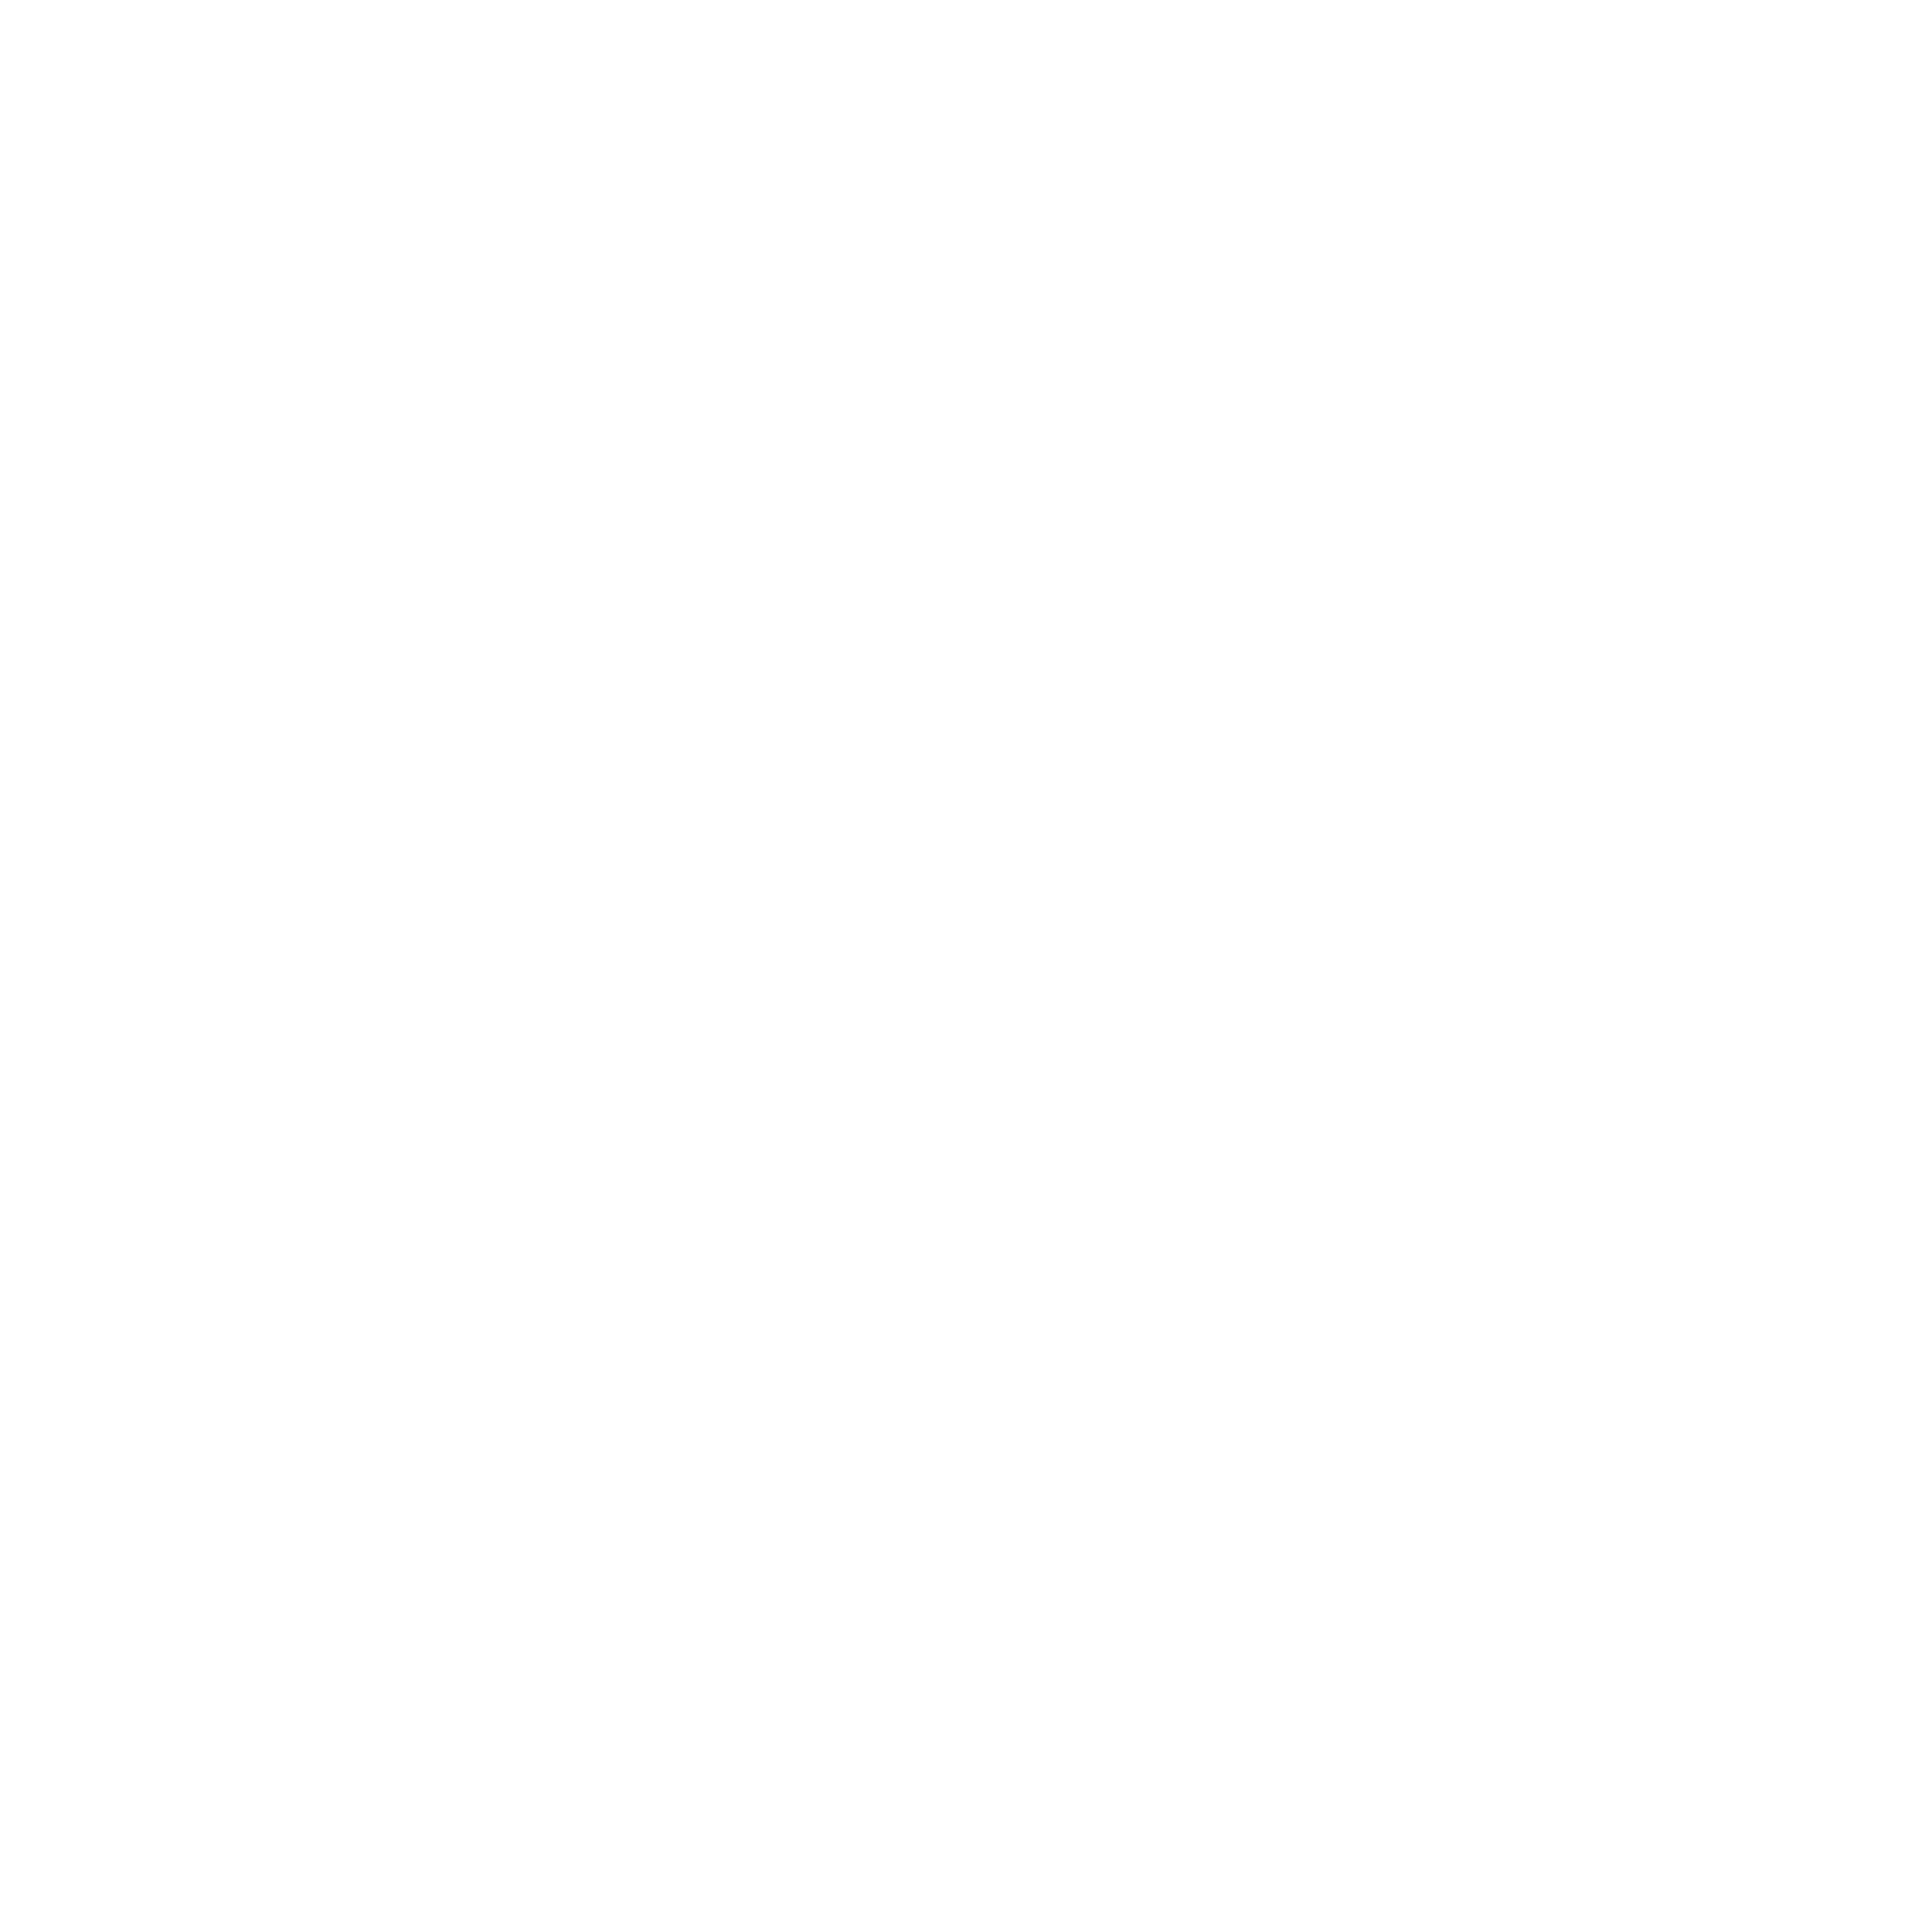

AttributeError: module 'matplotlib.pyplot' has no attribute 'mesh'

In [229]:
FILENAME="./data/CQPS paper/data for article/3G_102_phase.xlsx"
#OFFSET = 0.1836 - PERIOD/2

z=pd.read_excel(FILENAME)
plt.figure(figsize=(10,10))
plt.mesh(z)
plt.title("Test")
plt.show()
